# Topic Modelling & Classification


##### Here 20 Newsgroup dataset is processed to find the relevant topics by applying 4 different topic modelling algorithms. The document representions obtaied from them is then used to cluster the dataset using Kmeans Clustering. A more robust supervised classification model is also described for the classification task.

- Gensim ,NLTK and Spacy is used for text processing.
- Gensim and Scikit is used for topic modeling (BOW, TF-IDF, LDA, Doc2Vec).
- Scikit is used for clustering 
- pyLDAvis and Matplotlib is used for visualizing topics.

## Preprocessing data
Preprocessing will include clean data, lower docs, tokenization, filtering, etc. The final goal of preprocessing is to build a vocab with the given corpus, so that you could vectorize your docs with bag-of-words.

### 1. Fetch the raw data from the 20newsgroup corpora

In [351]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# we load both training and testing splits as our final project mainly focuses on the unsupervised setting. 
raw_dataset = fetch_20newsgroups(subset='all', shuffle=False)
print(raw_dataset.data[0])

From: cubbie@garnet.berkeley.edu (                               )
Subject: Re: Cubs behind Marlins? How?
Article-I.D.: agate.1pt592$f9a
Organization: University of California, Berkeley
Lines: 12
NNTP-Posting-Host: garnet.berkeley.edu


gajarsky@pilot.njin.net writes:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.



### 2. Clean the raw data

In [33]:
# Sklearn already implements an interface for this step.
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


In [34]:
corpus = dataset.data # save as the raw docs
labels = dataset.target # labels for clustering evaluation or supervised tasks
print(len(corpus), len(labels))
print(labels)
print(dataset.target_names)

18846 18846
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [42]:
# Let's show the first 10 documents
for i in range(10):
    doc = corpus[i]
    category = dataset.target_names[labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

In [35]:
#finding frequency of each category 
targets, frequency = np.unique(dataset.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984,
        990, 987, 997, 910, 940, 775, 628], dtype=int64))

In [36]:
targets_str = np.array(dataset.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 799), ('comp.graphics', 973), ('comp.os.ms-windows.misc', 985), ('comp.sys.ibm.pc.hardware', 982), ('comp.sys.mac.hardware', 963), ('comp.windows.x', 988), ('misc.forsale', 975), ('rec.autos', 990), ('rec.motorcycles', 996), ('rec.sport.baseball', 994), ('rec.sport.hockey', 999), ('sci.crypt', 991), ('sci.electronics', 984), ('sci.med', 990), ('sci.space', 987), ('soc.religion.christian', 997), ('talk.politics.guns', 910), ('talk.politics.mideast', 940), ('talk.politics.misc', 775), ('talk.religion.misc', 628)]


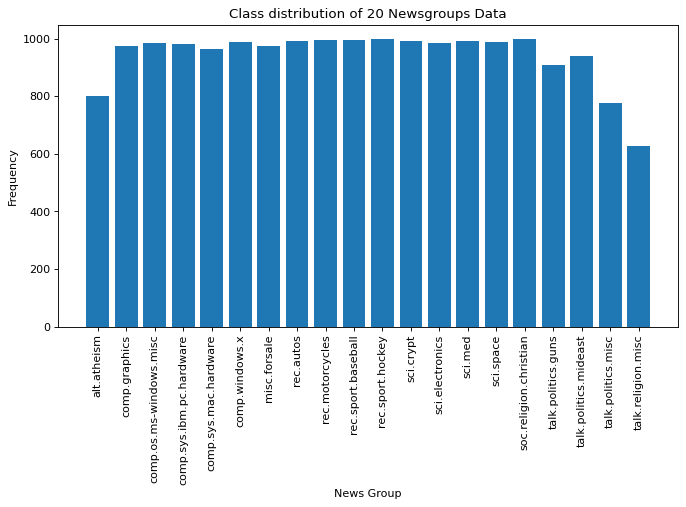

<Figure size 432x288 with 0 Axes>

In [39]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Class_distribution.png')

In [8]:
import pandas as pd
dataset_df = pd.DataFrame({'data': dataset.data, 'target': dataset.target})
dataset_df.head()

data  target
0  \nmorgan and guzman will have era's 1 run high...       9
1  Well, I just got my Centris 610 yesterday.  It...       4
2  Archive-name: cryptography-faq/part10\nLast-mo...      11
3  To the best of my knowledge there aren't any p...       4
4  \n\nI think that domestication will change beh...       0

### 3. Tokenize sentences and clean

In [9]:
# So, appraently, we need do more Pre-processing step
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwords_extended = stopwords.words('english')
stopwords_extended.extend(['from', 'subject', 're', 'edu', 'use', 'know', 'make','also','say','take','come','want','look','even','find','thing','problem','need'
                 ,'first','much','many','light','call','last'])
stopwords_extended=set(stopwords_extended)
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    en_stop.extend(['from', 'subject', 're', 'edu', 'use', 'know', 'make','also','say','take','come','want','look','even','find','thing','problem','need'
                 ,'first','much','many','light','call'])
    for doc in docs:
        raw_text = doc.lower()
        raw_text_stop = " ".join([i for i in raw_text.split() if i not in stopwords_extended])
        #punctuations
        raw_text_punc = raw_text_stop.translate(str.maketrans('', '', string.punctuation))
        #removing digits 
        raw_text = re.sub(r'\d+', '', raw_text_punc)
        #lemmatization
        #raw_text_lemma = " ".join(lemmatize.lemmatize(i) for i in raw_text.split())
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digits and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric() and not token.isalnum()]
        doc = [token for token in stopped_tokens_text if len(token) > 3]
        # you could always add some new preprocessing here
        yield doc

doc1 = remove_stopwords(corpus[0])
doc2 = preprocess_string(corpus[0])
doc3 = next(pre_processing([corpus[0]]))
print(dataset.data[0])
print(doc1)
print("=========================")
print(doc2)
print(doc3)


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
morgan guzman era's 1 run higher year, cubs idiots pitch harkey hibbard. castillo won't good (i think he's stud pitcher)
['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']
['morgan', 'guzman', 'eras', 'higher', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4. Build the Bigram, Trigram Models and Lemmatize

In [10]:
# Let's first get a new corpus by using one tokenization method above
# Also, for illustration purpose, we only take the first 1000 docs from the original corpus
corpus1 = list(pre_processing(corpus[:]))
print(len(corpus1))
print(corpus1[0])
# Then we build the vocab
freqs = defaultdict(int)
for doc in corpus1:
    for w in doc:
        freqs[w] += 1
print(len(freqs))
vocab = [w for w in freqs if freqs[w]>1]
print(len(vocab))

18846
['morgan', 'guzman', 'eras', 'higher', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
116403
47823


In [11]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(corpus1, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus1], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
import spacy
# Form Bigrams
data_words_bigrams = make_bigrams(corpus1)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [86]:
#alternate data for experimentation purpose 
data_words_trigrams = make_trigrams(corpus1)
data_lemmatized_alt = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Exploratory Analysis

To verify whether the preprocessing is good enough, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

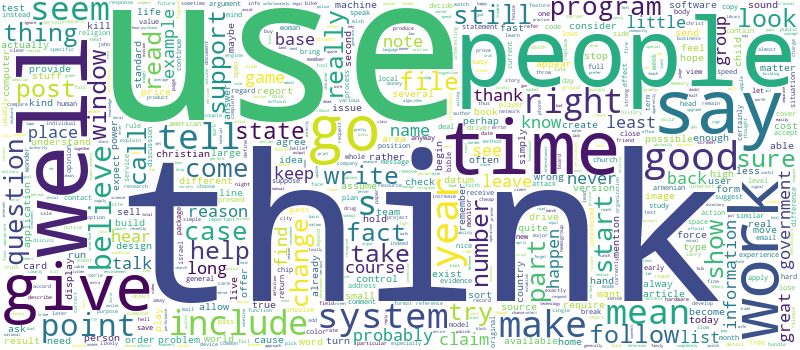

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed documnets together.
corpus_for_tf = []

for each_document in data_lemmatized:
    each_file = ""
    each_file += " ".join(each_token for each_token in each_document)
    corpus_for_tf.append(each_file)
long_string = ' '.join([sent for sent in corpus_for_tf ])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=8, contour_color='steelblue',width=800, height=350)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [27]:
wordcloud.to_file('wordcloud.png')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


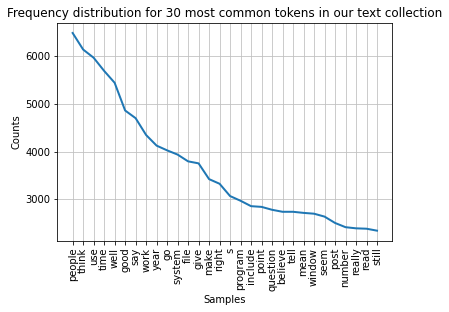

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [28]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
term_freq= FreqDist(word_tokenize(long_string))
term_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')

### 5. Build Vocab

In [67]:
from copy import deepcopy
# A more efficient way is to use gensim.corpora
dictionary = corpora.Dictionary(data_lemmatized)
print(dictionary)


# Prune the dict by filtering with document freq (DF)
dict1 = deepcopy(dictionary)
dict1.filter_extremes(no_below=15, no_above=0.5)# no_below and no_above are related to DF
print(dict1)

dict2 = deepcopy(dictionary)
dict2.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
print(dict2)

freqs = defaultdict(int)
for doc in data_lemmatized:
    for w in doc:
        freqs[w] += 1
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=10]
remove_ids = [dictionary.token2id[w] for w in low_tf_tokens]
print(len(remove_ids))
dictionary.filter_tokens(remove_ids)
dictionary.compactify()  # remove gaps in id sequence after words that were removed
print(dictionary)

# dictionray.cfs collects all the term freqs, similar to freqs
# Let's check if the new dictionary still has token with a tf <= 3
print(len([w for w in dictionary.cfs if dictionary.cfs[w]<=5]))

# Don't forget to save your vocab 
#dictionary.save('/Users/samee/OneDrive/Desktop/MScoursework/q5/ML/Final project/Data')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary(106030 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...)
Dictionary(6861 unique tokens: ['cub', 'good', 'high', 'idiot', 'morgan']...)
Dictionary(2000 unique tokens: ['good', 'high', 'idiot', 'pitch', 'pitcher']...)
95414
Dictionary(10616 unique tokens: ['cub', 'good', 'high', 'idiot', 'morgan']...)
0


In [87]:
dictionary_alt = corpora.Dictionary(data_lemmatized_alt)
freqs = defaultdict(int)
for doc in data_lemmatized_alt:
    for w in doc:
        freqs[w] += 1
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=10]
remove_ids = [dictionary_alt.token2id[w] for w in low_tf_tokens]
print(len(remove_ids))
dictionary_alt.filter_tokens(remove_ids)
dictionary_alt.compactify()

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


95742


In [88]:
dictionary.save('dictionary.dict')
dict1.save('dict1.dict')
dict2.save('dict2.dict')
dictionary_alt.save('dictionary_alt.dict')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 6. Vectorize the corpus

In [8]:
# You vocab/dictionary finally define your corpus
pprint(dictionary.token2id)

{"0's": 7361,
 '0+i4': 11110,
 '0-0': 20598,
 '0-0-0': 32544,
 '0-1': 14918,
 '0-2': 23947,
 '0-3': 18440,
 '0-4': 15236,
 '0-5mb': 19650,
 '0-6': 14919,
 '0-60': 9868,
 '0-9': 22034,
 '0-u': 26994,
 '0-uw': 26995,
 '0-uw0': 26996,
 '0-v': 26997,
 '0-w': 26998,
 '00': 2914,
 '00-00': 31414,
 '00-01': 31415,
 '00-02': 28304,
 '00-03': 28305,
 '00-04': 28763,
 '00-10': 33974,
 '00-9': 33975,
 '000': 1701,
 '0000': 6344,
 '00000-0': 22792,
 '00000000': 12449,
 '00000011': 12450,
 '00000074': 29441,
 '00001100': 12451,
 '0001': 31814,
 '00010001b': 12452,
 '00072': 17195,
 '000iu': 34276,
 '000mg': 34459,
 '000usd': 33112,
 '001': 7001,
 '00100010b': 12453,
 '0011': 12454,
 '00110000': 12455,
 '00110011': 12456,
 '00111100': 12457,
 '0013': 17196,
 '002': 18450,
 '003': 21719,
 '005': 32141,
 '007': 8099,
 '008': 21720,
 '00am': 33976,
 '00pm': 18675,
 '01': 4715,
 '01-00': 31416,
 '01-02': 21148,
 '01-03': 28306,
 '01-05': 28307,
 '010': 21721,
 '01000100b': 12458,
 '0123456789': 30726,
 

 '18084tm': 12126,
 '180mb': 30470,
 '181': 14365,
 '1813': 30962,
 '182': 13947,
 '1821': 32871,
 '183': 14366,
 '1830': 34769,
 '184': 14367,
 '185': 8618,
 '1850': 21909,
 '1853': 24731,
 '1858': 34318,
 '186': 14368,
 '1861': 31555,
 '1869': 18601,
 '187': 14369,
 '1876': 2334,
 '1879': 34739,
 '188': 124,
 '18800': 33403,
 '1881': 16596,
 '1885': 7526,
 '1886': 23711,
 '1889': 34740,
 '189': 14370,
 '1890': 27838,
 '1890-1902': 24023,
 '1895-1914': 24024,
 '1897': 24025,
 '1898': 21727,
 '1899': 32578,
 '18th': 25323,
 '19': 2141,
 '190': 13948,
 '1900': 13322,
 '1902': 2335,
 '1903': 21910,
 '1909': 21911,
 '191': 14371,
 '1911': 29172,
 '1912': 2336,
 '1913': 17820,
 '1914': 4719,
 '1914-1918': 24026,
 '1914-1920': 18782,
 '1915': 9650,
 '1916': 22561,
 '1917': 23133,
 '1918': 9808,
 '1918-1923': 24027,
 '1918-1929': 24028,
 '1918-22': 24029,
 '1919': 4720,
 '192': 9599,
 '1920': 4721,
 "1920's": 15680,
 '19200': 16597,
 '1920s': 9077,
 '1921': 7056,
 '1921-1923': 24030,
 '1922'

 '427-0674': 22794,
 '428': 13983,
 '428-3553': 12438,
 '429': 23609,
 '42bis': 29194,
 '42m': 27737,
 '43': 4337,
 '430': 21706,
 '431': 23610,
 '432': 21250,
 '433': 23611,
 '434': 30115,
 '435': 29214,
 '436': 21737,
 '437': 29814,
 '438': 21738,
 '439': 29025,
 '44': 4338,
 '440': 26085,
 '441': 5033,
 '44135': 2644,
 '442': 29026,
 '444': 22044,
 '445': 5777,
 '447': 13984,
 '448': 24540,
 '449': 12084,
 '44m': 6540,
 '44mb': 29324,
 '45': 186,
 '45-47': 31692,
 '450': 2924,
 '4500': 6252,
 '451': 29215,
 '452': 23053,
 '455': 21739,
 '455-8600': 35253,
 '456': 8960,
 '457': 28057,
 '458': 187,
 '459': 15767,
 '45am': 23252,
 '45g': 27989,
 '45m': 27088,
 '45pm': 33977,
 '45s': 27089,
 '45th': 13744,
 '45u': 17960,
 '46': 188,
 '46-1': 189,
 '460': 20067,
 '461': 26588,
 '462': 16603,
 '462-0666': 14403,
 '463': 28662,
 '464': 19473,
 '465': 21740,
 '466': 190,
 '467': 23612,
 '468': 29216,
 '469': 23359,
 '46942': 31693,
 '46k': 29708,
 '46v': 33791,
 '47': 191,
 '470': 29217,
 '

 "900's": 29281,
 '9000': 5688,
 '900c00': 35254,
 '900rr': 33393,
 '900ss': 22997,
 '901': 31736,
 '902': 14442,
 '9028': 28482,
 '903': 14443,
 '904': 25474,
 '90405': 16619,
 '906': 31728,
 '907': 14444,
 '908': 14445,
 '909': 14446,
 '90s': 4417,
 '91': 218,
 '91-92': 7809,
 '910': 14447,
 '911': 21744,
 '91109': 18587,
 '913': 14448,
 '914': 25464,
 '915': 24370,
 '9150618': 34244,
 '916': 25030,
 '918': 14449,
 '919': 14450,
 '92': 219,
 '92-93': 14451,
 '920': 32957,
 '921': 31214,
 '922': 13575,
 '923': 21745,
 '924': 5036,
 '925': 14452,
 '926': 14453,
 '927': 14454,
 '928': 11958,
 '929': 14455,
 '93': 1102,
 '930': 14456,
 '93103': 22797,
 '93105': 22798,
 '93117': 32914,
 '932': 14457,
 '933': 14458,
 '934': 14459,
 '935': 21746,
 '937': 14460,
 '938': 14461,
 '939': 20391,
 '94': 9606,
 '940': 14462,
 '94043': 18858,
 '94086': 18859,
 '941': 14463,
 '94103': 22499,
 '94117-0608': 22052,
 '942': 14464,
 '943': 14465,
 '944': 14466,
 '945': 14467,
 '947': 14468,
 '94720': 18

 'action': 2936,
 'actions': 2646,
 'activate': 30254,
 'activated': 2937,
 'activating': 2938,
 'activation': 25219,
 'active': 1857,
 'actively': 2342,
 'activism': 20548,
 'activist': 26320,
 'activists': 10675,
 'activities': 4727,
 'activity': 9093,
 'actix': 11959,
 'acton': 25065,
 'actors': 29109,
 'actrix': 12057,
 'acts': 4851,
 'actual': 747,
 'actuality': 25413,
 'actually': 748,
 'actualy': 18806,
 'actuarial': 25414,
 'acuity': 21983,
 'acupuncture': 11443,
 'acura': 13466,
 'acutally': 17144,
 'acute': 22452,
 'acyclovir': 30271,
 'ad': 2343,
 'ada': 24409,
 'adam': 5168,
 "adam's": 23145,
 'adamant': 34885,
 'adamof': 24039,
 'adams': 7463,
 'adana': 18604,
 'adapt': 7071,
 'adaptation': 15949,
 'adaptec': 22293,
 "adaptec's": 32372,
 'adapted': 864,
 'adapter': 9528,
 'adapters': 13326,
 'adapting': 7683,
 'adaptive': 12817,
 'adaptor': 15036,
 'adaptors': 18765,
 'adb': 833,
 'adc': 976,
 'adcom': 11847,
 'add': 4651,
 'add-in': 31077,
 'add-on': 15598,
 'added': 1936

 'alvin': 12758,
 'alway': 23961,
 'always': 2959,
 "alzheimer's": 34906,
 'ama': 13772,
 'amal': 20747,
 'amalekites': 34378,
 'amalgam': 2652,
 'amanda': 25509,
 'amann': 25760,
 'amarian': 13902,
 'amateur': 7411,
 'amateurs': 28868,
 'amatuer': 12645,
 'amaze': 11675,
 'amazed': 14866,
 'amazement': 15168,
 'amazes': 23463,
 'amazing': 2806,
 'amazingly': 12260,
 'ambartsumian': 35150,
 'ambassador': 18607,
 'ambassadors': 28004,
 'amber': 26606,
 'ambient': 9588,
 'ambiguity': 4351,
 'ambiguous': 17563,
 'ambition': 20454,
 'ambitions': 27966,
 'ambitious': 4476,
 'ambrose': 17826,
 'ambulance': 8114,
 'ambush': 34533,
 'amc': 25232,
 'amd': 7073,
 'amd386dxl-40': 35127,
 'amdahl': 10198,
 'amen': 9583,
 'amenable': 19970,
 'amend': 5038,
 'amended': 23517,
 'amendment': 5039,
 'amendments': 10065,
 'amenities': 9472,
 'amer': 26952,
 'america': 237,
 "america's": 2960,
 'american': 238,
 "american's": 25967,
 'americans': 2961,
 'americas': 20325,
 'ames': 5181,
 'amherst': 21472

 'armory': 14867,
 'armour': 20939,
 'armoured': 22510,
 'arms': 6690,
 'armstrong': 21405,
 'army': 5169,
 "army's": 8726,
 'arnie': 31818,
 'arnold': 24061,
 'arnon': 32127,
 'arose': 16992,
 'around': 1140,
 'arpa': 26611,
 'arpanet': 33757,
 'arrange': 18573,
 'arranged': 10577,
 'arrangement': 2978,
 'arrangements': 6264,
 'arranging': 13373,
 'array': 12875,
 'arraymax': 35305,
 'arrays': 18361,
 'arrest': 2158,
 'arrested': 2159,
 'arresting': 28864,
 'arrests': 6082,
 'arrhythmias': 25467,
 'arrival': 2979,
 'arrivals': 29781,
 'arrive': 2980,
 'arrived': 2981,
 'arrives': 13481,
 'arriving': 8125,
 'arrl': 11934,
 'arrogance': 9534,
 'arrogant': 7074,
 'arrogantly': 34534,
 'arromdee': 28807,
 'arromdian': 22564,
 'arromdians': 21920,
 'arround': 25324,
 'arrow': 13112,
 'arrows': 28373,
 'arsenal': 14507,
 'arseno': 34619,
 'arsenokoitai': 34593,
 'arsiv': 24062,
 'arsivi': 24063,
 'arson': 13374,
 'art': 251,
 'artemis': 15963,
 'arthritis': 26032,
 'arthur': 10204,
 'artic'

 'ballgame': 16309,
 'ballgames': 34598,
 'ballistic': 18362,
 'ballistics': 19697,
 'balloon': 6116,
 'balloons': 17254,
 'ballot': 9613,
 'ballots': 3001,
 'ballou': 35024,
 'ballpark': 23210,
 'ballplayers': 28656,
 'balls': 1477,
 'balltown': 26382,
 'ballyard': 20322,
 'baltic': 26442,
 'baltimore': 8779,
 'bam': 26286,
 "bamford's": 19615,
 'ban': 7995,
 'banana': 5906,
 'band': 1711,
 'bandaged': 8135,
 'bandied': 26107,
 'banding': 3002,
 'bandit': 29644,
 'bandits': 8136,
 'bandpass': 32833,
 'bands': 4121,
 'bandwagon': 9097,
 'bandwidth': 8493,
 'bandwith': 20898,
 'bang': 13425,
 'banged': 32182,
 'bangers': 23224,
 'banging': 11018,
 'bangladesh': 21475,
 'bani': 20027,
 'banish': 28712,
 'banished': 18613,
 'bank': 10111,
 'banked': 32358,
 'bankers': 33506,
 'banking': 3003,
 'bankrupt': 7736,
 'bankruptcy': 28645,
 'banks': 5013,
 'banned': 8465,
 'banner': 24676,
 'banners': 30674,
 'banning': 17787,
 'banquet': 19225,
 'bans': 11088,
 'banschbach': 25176,
 'bantam': 3

 'brainwashed': 22719,
 'brainwashing': 9474,
 'brake': 7030,
 'brakes': 7031,
 'braking': 9880,
 'branch': 4486,
 'branches': 20791,
 'brand': 3845,
 'brand-new': 25167,
 'brandeis': 26872,
 'brandishing': 34639,
 'brandon': 15175,
 'brands': 8471,
 'brandt': 26830,
 'brandy': 15684,
 'branstad': 17749,
 'brass': 10631,
 'brats': 15544,
 'braun': 29589,
 'brave': 6012,
 'braves': 7075,
 'bravo': 23187,
 'brawl': 26457,
 'brazil': 5952,
 'breach': 13598,
 'breaches': 25527,
 'bread': 7032,
 'breadth': 27993,
 'break': 2366,
 'break-in': 13222,
 'breakable': 22605,
 'breakaway': 14833,
 'breakdown': 15462,
 'breakdowns': 26373,
 'breaker': 6818,
 'breakers': 6819,
 'breakfast': 21641,
 'breaking': 273,
 'breaks': 7342,
 'breakthrough': 15482,
 'breakthroughs': 19873,
 'breakup': 12270,
 'bream': 11416,
 'breast': 12069,
 'breastfed': 35203,
 'breastfeeding': 35204,
 'breastmilk': 34800,
 'breasts': 8147,
 'breath': 4487,
 'breathable': 25792,
 'breathe': 8148,
 'breathed': 28719,
 'brea

 'carpal': 31577,
 'carpenter': 13378,
 "carpenter's": 31870,
 'carpet': 12607,
 'carpeting': 23810,
 'carriage': 26046,
 'carriages': 29725,
 'carried': 2662,
 'carrier': 978,
 'carriers': 3049,
 'carries': 8719,
 'carring': 14065,
 'carroll': 18894,
 'carrot': 21377,
 'carry': 1716,
 'carrying': 3050,
 'cars': 5408,
 'carson': 13176,
 'carsten': 32693,
 'cart': 3051,
 'cartel': 3052,
 'carter': 9990,
 'carthage': 12200,
 'cartographic': 26157,
 'cartoon': 12410,
 'cartoons': 32768,
 'cartridge': 7162,
 'cartridges': 7163,
 'carts': 10767,
 'carve': 12274,
 'carved': 30261,
 'carving': 19392,
 'cary': 17618,
 'cas': 26113,
 'casbah': 30025,
 'cascade': 31933,
 'case': 1961,
 'case-by-case': 16966,
 'case-patients': 33992,
 'cases': 6035,
 'casette': 28175,
 'casey': 10217,
 'cash': 5652,
 'cashman': 26858,
 'casing': 2107,
 'casio': 26461,
 'casper': 11612,
 'caspian': 26047,
 'cassels': 7824,
 'casserole': 19360,
 'cassette': 13143,
 'cassettes': 8508,
 'cassini': 21986,
 'cast': 910

 'ciphers': 293,
 'ciphertext': 294,
 'ciphertext-only': 30863,
 'ciphertexts': 22806,
 'cipriani': 21763,
 'circa': 10909,
 'circle': 3066,
 'circled': 23274,
 'circles': 4162,
 'circuit': 5151,
 'circuitry': 4084,
 'circuits': 982,
 'circular': 5420,
 'circularity': 34948,
 'circulate': 26530,
 'circulating': 25532,
 'circulation': 24724,
 'circumcision': 10130,
 'circumference': 12129,
 'circumstance': 25415,
 'circumstances': 1720,
 'circumstancial': 10667,
 'circumvent': 6037,
 'circus': 28157,
 'circut': 32749,
 'cirrhosis': 33106,
 'cirrus': 15635,
 'cis': 11869,
 'cisc': 5756,
 'cisco': 26953,
 'cisv': 30524,
 'cit': 15983,
 'citadels': 8790,
 'citation': 15279,
 'citations': 24465,
 'cite': 6734,
 'cited': 295,
 'cites': 25416,
 'citibank': 23557,
 'cities': 4493,
 'citing': 3879,
 'citizen': 6482,
 "citizen's": 17430,
 'citizenry': 21030,
 'citizens': 4658,
 'citizenship': 20152,
 'citrus': 26103,
 'city': 2173,
 "city's": 6382,
 'civic': 4966,
 'civil': 4163,
 'civilains': 3

 'compass3': 27885,
 'compass4': 27886,
 'compass5': 27887,
 'compass6': 27888,
 'compass7': 27889,
 'compass8': 27890,
 'compassion': 11560,
 'compassionate': 15897,
 'compat': 21536,
 'compatability': 14704,
 'compatable': 14658,
 'compatibility': 17483,
 'compatible': 3926,
 'compatibles': 13059,
 'compdyn': 12414,
 'compel': 23938,
 'compelled': 18394,
 'compelling': 6618,
 'compendium': 28870,
 'compensate': 5276,
 'compensation': 14773,
 'compete': 1103,
 'competence': 20277,
 'competency': 15285,
 'competent': 6619,
 'competently': 28084,
 'competing': 9411,
 'competition': 9298,
 'competitive': 6173,
 'competitiveness': 13755,
 'competitor': 15563,
 'competitors': 3903,
 'compilation': 6132,
 'compile': 5263,
 'compile-time': 33407,
 'compiled': 10221,
 'compiler': 9067,
 'compilers': 10222,
 'compiles': 19460,
 'compiling': 18907,
 'complacency': 30693,
 'complain': 29,
 'complained': 20154,
 'complaining': 11445,
 'complains': 7828,
 'complaint': 2610,
 'complaints': 11478,
 

 'corrosive': 30296,
 'corrupt': 11619,
 'corrupted': 10477,
 'corrupting': 18395,
 'corruption': 8716,
 'corrupts': 5217,
 'corson': 20607,
 'cortex': 30671,
 'corvette': 15135,
 'corvettes': 20071,
 'cory': 7122,
 'cos': 9481,
 'cosar': 8904,
 'cose': 3977,
 'cose-complient': 28258,
 'cosmetic': 9570,
 'cosmic': 13060,
 'cosmological': 25326,
 'cosmology': 31043,
 'cosmopolitan': 23478,
 'cosmos': 16302,
 'cosmospheres': 3118,
 'cosponsored': 19228,
 'cost': 1061,
 'cost-effective': 14726,
 'costa': 3119,
 'costar': 15990,
 'costello': 24431,
 'costing': 20678,
 'costly': 15292,
 'costs': 5186,
 'costume': 33630,
 'cosy_notes': 35133,
 'cosy_pak': 35134,
 'cosy_pak_09': 35135,
 'cosy_pak_ibm_09': 35136,
 'cote': 13117,
 'cotton': 23276,
 'couch': 13380,
 'cough': 26498,
 "could've": 20300,
 'coulda': 5803,
 'couldnt': 33016,
 'coulman': 14536,
 'council': 3120,
 'councils': 31419,
 'counsel': 19298,
 'counseling': 23838,
 'counselling': 6209,
 'counselor': 19673,
 'count': 2790,
 'co

 'd9': 1307,
 'd_': 29972,
 'd_k': 33655,
 'da': 5627,
 'dab': 29590,
 'dabro': 33136,
 'dac': 15027,
 'dacha': 25912,
 'dad': 26131,
 "dad's": 5644,
 'daddy': 22902,
 'daemon': 16663,
 'daemons': 15488,
 'dagestan': 34119,
 'dagger': 22946,
 'dahiliye': 24100,
 'dahl': 29842,
 'dahlen': 13007,
 'dahlquist': 11097,
 'daigle': 13667,
 'daigneault': 29843,
 'daily': 4427,
 'dair': 24101,
 'dairy': 29593,
 'dakota': 24734,
 'dal': 13611,
 'dale': 7653,
 'dalgarno': 13118,
 'dallas': 2897,
 'dam': 31109,
 'damage': 3137,
 'damaged': 3138,
 'damages': 8644,
 'damaging': 8645,
 'damascus': 17831,
 'dame': 22695,
 'dammit': 5461,
 'damn': 5462,
 'damnation': 7772,
 'damned': 4252,
 'damon': 11419,
 'damp': 24606,
 'damphousse': 6315,
 'damsus': 17832,
 'dan': 6964,
 "dan's": 25802,
 'dana': 28810,
 'dance': 4108,
 'danced': 28233,
 'dancer': 23946,
 'dancers': 31824,
 'dances': 23891,
 'dancing': 7740,
 'dandy': 16198,
 'daneyko': 13119,
 'danforth': 17374,
 'dang': 28669,
 'danger': 10647,
 

 'desire': 7999,
 'desireable': 31476,
 'desired': 3152,
 'desires': 12287,
 'desiring': 20795,
 'desjardins': 26261,
 'desk': 15184,
 'deskjet': 11194,
 'deskjets': 22424,
 'desks': 28467,
 'deskset': 34563,
 'desktop': 3978,
 'desktops': 23339,
 'deskwriter': 10768,
 'desolate': 5546,
 'despair': 31825,
 'desparate': 22560,
 'desperate': 14943,
 'desperately': 6318,
 'desperation': 20301,
 'despicable': 28926,
 'despise': 5933,
 'despised': 10939,
 'despiseth': 34817,
 'despite': 7560,
 'despotism': 26048,
 'desqview': 3884,
 'destabilization': 20838,
 'destdir': 35038,
 'destination': 12475,
 'destinations': 2079,
 'destined': 28185,
 'destiny': 14542,
 'destrade': 32121,
 'destroy': 2678,
 'destroy_count': 34143,
 'destroyed': 3153,
 'destroyers': 3154,
 'destroying': 4057,
 'destroyrec': 34144,
 'destroys': 24338,
 'destruction': 9814,
 'destructive': 14914,
 'destructor': 16379,
 'det': 19661,
 'det-5': 34972,
 'det-6': 34973,
 'det-7': 34974,
 'detach': 33722,
 'detachable': 213

 'disproved': 15919,
 'disproven': 32103,
 'disproving': 18679,
 'dispute': 3174,
 'disputed': 3175,
 'disputes': 3176,
 'disputing': 25238,
 'disqualified': 12643,
 'disregard': 8739,
 'disregarded': 20868,
 'disregarding': 23587,
 'disrespectful': 22704,
 'disrupt': 23582,
 'disrupted': 2045,
 'disruptive': 22493,
 'dissatisfied': 13314,
 'disseminated': 20869,
 'disseminating': 26292,
 'dissemination': 20032,
 'dissent': 28566,
 'dissertation': 2621,
 'disservice': 30301,
 'dissident': 11817,
 'dissidents': 20870,
 'dissimilar': 19880,
 'dissipate': 12966,
 'dissipation': 32057,
 'dissolution': 33763,
 'dissolve': 28948,
 'dissolved': 17299,
 'dissolves': 33544,
 'dissuade': 17222,
 'dist': 16674,
 'distance': 1687,
 'distances': 14687,
 'distant': 3177,
 'distilled': 31895,
 'distinct': 7693,
 'distinction': 9744,
 'distinctions': 21261,
 'distinctive': 11499,
 'distinctly': 9121,
 'distinguish': 5962,
 'distinguished': 26325,
 'distinguishes': 21262,
 'distinguishing': 22856,
 'di

 'dw': 12479,
 'dwallach': 25079,
 'dwarf': 15997,
 'dwarfs': 26227,
 'dwell': 10940,
 'dwelling': 6840,
 'dwellings': 32060,
 'dwex': 33411,
 'dwi': 17859,
 'dword': 34586,
 'dx': 5257,
 'dx-50': 30252,
 'dx2': 8709,
 'dx2-50': 30253,
 'dx2-66': 30083,
 'dx50': 8710,
 'dxf': 7326,
 'dxterm': 23025,
 'dxwm': 31940,
 'dy': 18086,
 'dye': 19771,
 'dyer': 25456,
 'dying': 5547,
 'dykstra': 10092,
 'dylan': 10093,
 'dynamic': 11727,
 'dynamical': 6267,
 'dynamically': 21265,
 'dynamics': 9905,
 'dynamite': 7419,
 'dynasty': 3202,
 'dysfunction': 7936,
 'dysfunctional': 32999,
 'dz': 29973,
 'e-mail': 3865,
 'e-mailed': 16930,
 'e0': 24897,
 'e1': 11144,
 'e145': 11145,
 'e14di+5u': 24898,
 'e14dm75u': 24899,
 'e1t': 11146,
 'e2': 21107,
 'e22u': 32410,
 'e3': 21108,
 'e4': 21109,
 'e5': 24900,
 'e6': 29974,
 'e7': 29734,
 'e8': 18087,
 'e86': 18088,
 'e9': 18089,
 'e9c': 11147,
 'e9f': 18090,
 'e9l0qax': 1308,
 'e_': 23520,
 'e_k': 23521,
 'ea': 15306,
 'eachother': 9816,
 'eachus': 28077,

 'enraged': 14166,
 'enriched': 28265,
 'enrichment': 32112,
 'enrolled': 32161,
 'enroute': 3228,
 'ens': 19440,
 'enslaved': 35242,
 'ensue': 17729,
 'ensued': 23979,
 'ensuing': 14105,
 'ensure': 10844,
 'ensures': 7567,
 'ensuring': 8659,
 'ent': 29385,
 "ent's": 29386,
 'entail': 10135,
 'entails': 4204,
 'enter': 5382,
 'entered': 2401,
 'entering': 7308,
 'enterpoop': 33309,
 'enterprise': 11525,
 'enterprises': 4771,
 'enterprising': 23230,
 'enters': 6845,
 'entertain': 23454,
 'entertained': 30843,
 'entertaining': 9415,
 'entertainment': 17809,
 'enthusiasm': 29643,
 'enthusiast': 19549,
 'enthusiastic': 9128,
 'enthusiastically': 9129,
 'enthusiasts': 9235,
 'entire': 2686,
 'entirely': 5564,
 'entirety': 22081,
 'entities': 10701,
 'entitled': 4670,
 'entitles': 31472,
 'entity': 7938,
 'entrance': 3229,
 'entrangeres': 24121,
 'entrants': 26989,
 'entrenched': 22322,
 'entrepreneurs': 4205,
 'entries': 5724,
 'entropy': 18933,
 'entrusted': 31347,
 'entry': 7841,
 "entry'

 'extern': 16396,
 'external': 5655,
 'externally': 17489,
 'extinction': 25135,
 'extinctions': 26233,
 'extinguisher': 25332,
 'extortion': 8662,
 'extra': 3254,
 'extra-marital': 20839,
 'extra-scientific': 17106,
 'extra_libraries': 31942,
 'extract': 14080,
 'extracted': 15639,
 'extracting': 16692,
 'extraction': 18941,
 'extracts': 13914,
 'extramarital': 34601,
 'extraneous': 29802,
 'extraordinarily': 29745,
 'extraordinary': 12631,
 'extrapolate': 10071,
 'extrapolating': 25269,
 'extrapolation': 34259,
 'extras': 7164,
 'extraterrestrial': 16021,
 'extreme': 3255,
 'extremely': 1741,
 'extremes': 2409,
 'extremist': 23181,
 'extremists': 20812,
 'extropy': 26841,
 'exuberant': 17226,
 'exug': 31943,
 'ey': 18094,
 'eye': 3256,
 'eye-witness': 25745,
 'eye-witnessed': 24131,
 'eyeball': 33566,
 'eyeballs': 32782,
 'eyed': 23824,
 'eyes': 3257,
 'eyewitness': 8222,
 'eyewitnesses': 24132,
 'ez': 29508,
 'eze': 35061,
 'ezekiel': 9000,
 'ezra': 23215,
 "f'ax": 24903,
 'f+n': 27

 'film': 4515,
 'filmed': 24560,
 'films': 8230,
 'filter': 4127,
 'filtered': 17302,
 'filtering': 17490,
 'filters': 6349,
 'filth': 25921,
 'filthy': 26915,
 'filtration': 21486,
 'fim': 33811,
 'fin': 10601,
 'final': 7127,
 'finale': 33943,
 'finalized': 12068,
 'finally': 1556,
 'finals': 1105,
 'finance': 1557,
 'financed': 3275,
 'finances': 4281,
 'financial': 396,
 'financially': 13462,
 'financing': 19302,
 'find': 954,
 'finder': 12586,
 'finding': 2018,
 'finding-sources': 28813,
 'findings': 10072,
 'finds': 10262,
 'fine': 1065,
 'fined': 17364,
 'fines': 28542,
 'finest': 22467,
 'finger': 6248,
 'fingernail': 30884,
 'fingerprint': 25720,
 'fingers': 6919,
 'fingertips': 15863,
 'finish': 11884,
 'finished': 3276,
 'finishes': 16400,
 'finishing': 31652,
 'finite': 5343,
 'fink': 28118,
 'finland': 9237,
 'finley': 23981,
 'finn': 15324,
 'finney': 15914,
 'finnish': 10819,
 'finns': 20615,
 'fins': 26965,
 'fips': 397,
 'fir': 16023,
 'fire': 2200,
 'firearm': 5050,
 

 'fx': 18106,
 'fy': 18107,
 'fyi': 13561,
 'fyl': 18108,
 'fyn': 18109,
 'fz': 29509,
 'fz0': 24910,
 'fzntq': 29510,
 'fzr': 32642,
 "g'd": 29066,
 "g'day": 24545,
 'g-7': 33272,
 'g-d': 19428,
 'g-m': 27249,
 'g-men': 30021,
 'g-s': 30542,
 'g0': 18110,
 'g0f': 27250,
 'g1': 27251,
 'g2': 11152,
 'g20': 21565,
 'g2k': 23511,
 'g3': 29975,
 'g3n': 30543,
 'g3o': 33912,
 'g3states': 34776,
 'g4': 24911,
 'g4t': 33812,
 'g5': 31242,
 'g5g': 34672,
 'g6': 24912,
 'g7': 11925,
 'g8': 31243,
 'g83': 18111,
 'g9': 1320,
 'g92': 18112,
 'g92e3': 18113,
 'g9p': 1321,
 'g9u': 24913,
 'g9v': 1322,
 'g9v4e': 18114,
 'g9vjpwu': 27252,
 'g_': 18115,
 'ga': 18946,
 'gaa': 14835,
 'gabe': 16404,
 'gabriel': 25498,
 'gadget': 6759,
 'gadgets': 11841,
 'gaetti': 17662,
 'gag': 17048,
 'gagne': 23415,
 'gagner': 20618,
 'gai44': 407,
 'gaijin': 15055,
 'gail': 17049,
 'gain': 4085,
 'gained': 3298,
 'gaines': 408,
 'gainesville': 20318,
 'gainey': 15581,
 'gaining': 774,
 'gains': 22256,
 'gal': 22207

 'gnostics': 30164,
 'gnp': 11534,
 'gnu': 16705,
 'gnuplot': 18954,
 'gnv': 19149,
 'go': 1563,
 'go-ahead': 20443,
 'go32': 26920,
 'goal': 5471,
 'goaldingers': 14559,
 'goalie': 7850,
 "goalie's": 29265,
 'goalies': 7851,
 'goals': 5472,
 'goaltender': 14836,
 'goaltenders': 13233,
 'goaltending': 5473,
 'goat': 26810,
 'goats': 28160,
 'goblin': 26135,
 'gochnak': 26985,
 'god': 2701,
 "god's": 2702,
 'god-shaped': 19692,
 'goddamn': 9549,
 'goddard': 12903,
 'goddess': 9860,
 'goddess-mother': 34520,
 "godel's": 30971,
 'godhead': 17841,
 'godiva': 21793,
 'godless': 20931,
 'godly': 10635,
 'gods': 11006,
 'godzilla': 29125,
 'goebbels': 29776,
 'goes': 1173,
 'goetz': 26660,
 'goggles': 20239,
 'going': 775,
 'golan': 23698,
 'gold': 6664,
 'golda': 22588,
 'goldberg': 10274,
 'golden': 2422,
 'goldin': 23770,
 'goldstar': 31571,
 'goldstone': 22391,
 'golf': 12969,
 'golgotha': 13643,
 'golly': 23452,
 'goltz': 22516,
 'gomez': 27805,
 'gomorrah': 26197,
 'gona': 10968,
 'gona

 'hawking': 23444,
 'hawks': 5636,
 'hawkworld': 23630,
 'hay': 23139,
 'hayati': 24155,
 'hayes': 25766,
 'haynes': 31664,
 'hays': 28056,
 'hayward': 8066,
 'hazard': 6860,
 'hazardous': 20894,
 'hazards': 15665,
 'haze': 31595,
 'hazine-i': 24156,
 'hazirliklari': 24157,
 'hazrat': 28570,
 'hazy': 22298,
 'hb': 10899,
 'hb9nby': 24667,
 'hc': 25443,
 'hc11': 24721,
 'hci': 21795,
 'hd': 6562,
 "hd's": 6563,
 'hdd': 14100,
 'hdf': 26667,
 'hdl': 26115,
 'hds': 22545,
 'hdt': 34309,
 'hdtv': 23916,
 'head': 958,
 'headache': 10547,
 'headaches': 14809,
 'headed': 5697,
 'header': 1494,
 'headers': 9241,
 'heading': 17636,
 'headings': 28682,
 'headland': 34890,
 'headlight': 19977,
 'headlights': 8535,
 'headline': 12130,
 'headlines': 3329,
 'headlong': 26299,
 'headphone': 28167,
 'headphones': 2209,
 'headquartered': 20037,
 'headquarters': 3330,
 'headrest': 27903,
 'heads': 1993,
 'headset': 27959,
 'headway': 18771,
 'heal': 2706,
 'healed': 2707,
 'healer': 28753,
 'healers': 2

 'ideally': 15494,
 'ideals': 11713,
 'ideas': 995,
 'identical': 434,
 'identically': 16204,
 'identifiable': 21270,
 'identification': 9751,
 'identified': 6864,
 'identifier': 15495,
 'identifies': 16408,
 'identify': 8258,
 'identifying': 11228,
 'identities': 23589,
 'identity': 16968,
 'ideological': 1032,
 'ideologies': 10623,
 'ideology': 6437,
 'idf': 17190,
 'idiocy': 22713,
 'idiom': 25707,
 'idiot': 5910,
 'idiotic': 15583,
 'idiots': 5,
 'idk': 18141,
 'idl': 16053,
 'idl-pvwave': 26670,
 'idle': 10280,
 'idling': 25265,
 'idly': 29746,
 'idol': 20537,
 'idolaters': 7698,
 'idolatry': 12304,
 'idols': 29068,
 'idraw': 16721,
 'ids': 8259,
 'ie': 4369,
 'ieee': 435,
 'ifas': 19152,
 'ifdef': 10281,
 'iff': 18968,
 'ifi': 32646,
 'ifn': 35206,
 'ifndef': 30759,
 'iftccu': 11070,
 'ig': 31790,
 'iga': 34803,
 'igc': 7261,
 'iges': 33164,
 'igg': 34804,
 'igm': 16054,
 'ignite': 11040,
 'ignited': 25864,
 'ignition': 10536,
 'ignorance': 4604,
 'ignorant': 4166,
 'ignore': 109

 'informatik': 16723,
 'information': 446,
 'information-theoretic': 33981,
 'informational': 30206,
 'informations': 29155,
 'informative': 10286,
 'informed': 8711,
 'informing': 20967,
 'informix': 20081,
 'informs': 25825,
 'infotrac': 30207,
 'infoworld': 17864,
 'infrared': 16058,
 'infrastructure': 13762,
 'infrequent': 11808,
 'infrequently': 25557,
 'infringe': 13603,
 'infringed': 23033,
 'infringement': 13604,
 'infringing': 13605,
 'ing': 20040,
 'ingested': 25185,
 'ingesting': 2056,
 'ingestion': 15795,
 'ingilizce': 24176,
 'ingles': 25236,
 'ingr': 19992,
 'ingrained': 23387,
 'ingredient': 26105,
 'ingredients': 6114,
 'ingres': 21546,
 'ingress': 21156,
 'inhabit': 28237,
 'inhabitants': 3357,
 'inhabited': 25423,
 'inhalants': 22926,
 'inhalation': 14115,
 'inhale': 30237,
 'inherent': 15352,
 'inherently': 5326,
 'inherit': 3358,
 'inheritance': 26302,
 'inherited': 9754,
 'inhibited': 30707,
 'inhuman': 14086,
 'inhumane': 8746,
 'inhumanity': 32561,
 'ini': 10531,

 'iridology': 34414,
 'iris': 12820,
 'irisa': 33170,
 'irish': 14960,
 'irit': 32107,
 'irix': 26675,
 'iron': 12911,
 'ironic': 3375,
 'ironically': 15921,
 'irony': 11289,
 'iroquois': 35298,
 'irq': 13690,
 "irq's": 23565,
 'irq2': 28098,
 'irq3': 24461,
 'irq4': 24462,
 'irq5': 24463,
 'irq7': 22450,
 'irq9': 24669,
 'irqs': 23566,
 'irrational': 1767,
 'irrationality': 29772,
 'irreconcilable': 24493,
 'irrefutable': 22913,
 'irregular': 9921,
 'irregulars': 15867,
 'irrelevancies': 23744,
 'irrelevant': 2840,
 'irrelevent': 8749,
 'irrespective': 18707,
 'irresponsible': 15550,
 'irreversible': 33013,
 'irritate': 28102,
 'irritating': 23705,
 'irritation': 25985,
 'irs': 10292,
 'irulesrc': 35044,
 'irvin': 32278,
 'irvine': 20425,
 'irving': 31568,
 'irwin': 27811,
 'isa': 5258,
 'isaac': 11639,
 'isaiah': 2720,
 "isaiah's": 29070,
 'isalnum': 30763,
 'isas': 16065,
 'isascii': 30764,
 'isbn': 15105,
 'isc': 16731,
 'isc-br': 22683,
 'iscis': 35023,
 'isdn': 13851,
 'isga': 28

 'jungle': 11714,
 'junior': 13668,
 'junk': 7493,
 'junkyard': 7377,
 'juno': 23989,
 'junta': 3383,
 'jupiter': 4111,
 "jupiter's": 16233,
 'jur': 33511,
 'juris': 20564,
 'jurisdiction': 8941,
 'jurisdictions': 9924,
 'jurk': 33815,
 'jurk7': 33816,
 'jurmw': 33817,
 'jurors': 2223,
 'jury': 4533,
 'just': 53,
 'justice': 4534,
 'justifiable': 13531,
 'justifiably': 25424,
 'justification': 7702,
 'justifications': 12644,
 'justified': 5350,
 'justifies': 4169,
 'justify': 8016,
 'justifying': 20813,
 'justin': 21274,
 'justly': 12312,
 'juvenile': 15060,
 'juxtaposition': 8851,
 'jv': 29981,
 'jvc': 27939,
 'jview': 32805,
 'jvm': 33818,
 'jvmk': 33819,
 'jvmk7': 33820,
 'jvmmw': 33821,
 'jvw': 33822,
 'jvwk': 33823,
 'jvwmw': 34183,
 'jw': 16741,
 'jx': 27292,
 'jy': 27293,
 'jyu': 33173,
 'jz': 24929,
 'jz7': 27294,
 'jznki': 27295,
 'k-12': 28049,
 'k-bit': 23528,
 'k-mart': 11950,
 'k0': 29982,
 'k1': 23529,
 'k2': 23530,
 'k3': 23531,
 'k4': 18160,
 'k5': 31255,
 'k6': 18161,


 'ks': 18985,
 'ksc': 16071,
 'ksh': 32500,
 'kssimon': 24405,
 'ksu': 32210,
 'kt': 17534,
 'ktc': 24935,
 'kth': 7356,
 'ktvb': 2227,
 'ku': 14896,
 'kuala': 12001,
 'kubel': 12736,
 'kubota': 26677,
 'kudelski': 24385,
 'kuiper': 8882,
 'kuliyev': 25929,
 'kulkhandanian': 26421,
 'kumsal': 33299,
 'kungfu': 33637,
 'kuo': 11642,
 'kur': 24204,
 'kurat': 24205,
 'kurd': 9828,
 'kurdish': 4792,
 'kurds': 9675,
 'kurosawa': 34328,
 'kurri': 21450,
 'kurt': 18490,
 'kurtulus': 24206,
 'kuwait': 21931,
 "kuwait's": 34486,
 'kuwaiti': 22782,
 'kuwaitis': 20831,
 'kv': 29984,
 'kvam': 32648,
 'kvartalnov': 29876,
 'kw': 23198,
 'kx': 31153,
 'ky': 27307,
 'kyocera': 34026,
 'kyoto': 29156,
 'kyriazis': 33180,
 'kz': 23852,
 "l'enfant": 21995,
 "l'l": 27308,
 "l's": 10542,
 'l+i': 1338,
 'l+i4': 1339,
 'l-2pl': 27309,
 'l-2pu': 27310,
 'l-45': 29520,
 'l0': 29521,
 'l0c': 9015,
 'l1': 12490,
 'l2': 29522,
 'l3': 12491,
 'l4': 24936,
 'l45u': 18171,
 'l4he': 24937,
 'l5': 21110,
 'l6': 29523

 'litigation': 9497,
 'litre': 27904,
 'litres': 34929,
 'litter': 22528,
 'littered': 31607,
 'little': 1581,
 'littlest': 14586,
 'littleton': 5847,
 'littman': 29883,
 'liturgical': 19723,
 'liturgy': 19724,
 'liu': 9642,
 'liv': 9460,
 'live': 2847,
 'lived': 1691,
 'livelihood': 20499,
 'liver': 15796,
 'livermore': 15620,
 'liverpool': 9461,
 'lives': 2732,
 'lives_lost': 31179,
 'livestock': 22684,
 'living': 3397,
 'liz': 18996,
 'lizard': 12781,
 'lj': 1340,
 'lj1': 27321,
 'lj1d': 27322,
 'ljubljana': 31857,
 'lk': 18175,
 'lk1': 32703,
 'lk2': 32704,
 'lk4': 18176,
 'lk8': 27323,
 'lk8v': 27324,
 'lkg': 30420,
 'lki': 30558,
 'lkjz': 27325,
 'll': 18177,
 'll5j': 18178,
 'llama': 11264,
 'llat': 22104,
 'llnl': 10306,
 'llo': 11822,
 'lloyd': 12835,
 'lm': 10799,
 'lm9': 29526,
 'lmc': 16076,
 'lmsc': 29604,
 'ln': 17536,
 'lnsl': 25773,
 'lo': 13679,
 'load': 2733,
 'loaded': 3867,
 'loader': 21460,
 'loaders': 32739,
 'loading': 6069,
 'loads': 1000,
 'loan': 11248,
 'loan

 'mainwindow': 6762,
 'mainyu': 31355,
 'maj': 14006,
 'majestic': 2473,
 'majesty': 23796,
 'major': 2087,
 'majority': 4542,
 'majors': 1500,
 'mak': 14590,
 'makaleler': 18641,
 'makarios': 31927,
 'makarov': 11104,
 'make': 1501,
 'makedepend': 28970,
 'makefile': 10885,
 'makefiles': 31950,
 'makela': 26547,
 'maker': 6049,
 'makers': 8712,
 'makes': 2737,
 'makeshift': 26057,
 'makesubdirs': 34781,
 'makeup': 11528,
 'making': 1113,
 'makings': 15584,
 'mal': 27342,
 'malachi': 34091,
 'malakhov': 13126,
 'malakoi': 34622,
 'malakos': 35130,
 'malarchuk': 28420,
 'malaria': 12569,
 'malaspina': 23898,
 'malaysia': 12004,
 'malcolm': 10613,
 'maldanado': 23172,
 'maldonado': 21243,
 'male': 4687,
 'male-male': 34409,
 'males': 10509,
 'malfunction': 6874,
 'malfunctioning': 32138,
 'malice': 34711,
 'malicious': 26951,
 'maliciously': 30313,
 'mall': 8289,
 'malloc': 10311,
 'malls': 24507,
 'malm': 29158,
 'malmo': 23378,
 'malnutrition': 7925,
 'malpractice': 9500,
 'maltais': 2

 'mentioning': 18383,
 'mentions': 7870,
 'mentor': 9383,
 'ments': 33692,
 'menu': 6763,
 'menu-driven': 16762,
 'menubar': 6764,
 'menudo': 30314,
 'menus': 5633,
 'meps': 34883,
 'meray': 24219,
 'merced': 17383,
 'mercedes': 9931,
 'mercenaries': 23755,
 'mercenary': 3422,
 'merchandise': 15572,
 'merchant': 18740,
 'merchants': 3423,
 'merciful': 11357,
 'mercifully': 21589,
 'merck': 34808,
 'mercury': 13443,
 "mercury's": 22620,
 'mercy': 10147,
 'merde': 34156,
 'mere': 5764,
 'merely': 6021,
 'merge': 25565,
 'merged': 26329,
 'merging': 25277,
 'meridian': 28716,
 'merit': 500,
 'merits': 12224,
 'meritt': 27914,
 'merkle': 501,
 'merrimack': 32621,
 'merry': 20383,
 'mesa': 23193,
 'mesele-yi': 24220,
 'meselesi': 24221,
 "meselesi'ne": 24222,
 'mesh': 19004,
 'meshed': 34464,
 'meshes': 25489,
 'meshing': 26686,
 'meson': 22989,
 'mesrutiyetten': 24223,
 'mess': 4310,
 'message': 502,
 'message-digest': 34386,
 'message-id': 9676,
 'messages': 503,
 'messaging': 13542,
 'me

 'moments': 2483,
 'momentum': 2125,
 'momesso': 24772,
 'mon': 7404,
 'monaco': 22254,
 'monarch': 17810,
 'monarchianism': 21279,
 'monarchy': 31357,
 'monash': 21551,
 'moncton': 8809,
 'monday': 2237,
 'mondros': 24229,
 'monetary': 9167,
 'money': 1587,
 'monica': 16770,
 'monies': 28915,
 'monitering': 19581,
 'monitor': 4129,
 "monitor's": 23012,
 'monitored': 25567,
 'monitoring': 15373,
 'monitors': 6537,
 'monk': 17468,
 'monkees': 34748,
 'monkey': 10525,
 'monkeys': 22823,
 'monks': 18733,
 'mono': 10171,
 'monochromatic': 19016,
 'monochrome': 10320,
 'monogamous': 31879,
 'monograph': 21829,
 'monolithic': 8482,
 'monophysite': 33397,
 'monophysites': 9758,
 'monophysitism': 9759,
 'monopoly': 8924,
 'monoxide': 31432,
 'monsanto': 21700,
 'monsarrat': 30781,
 'monster': 13485,
 'monsters': 11599,
 'monstrous': 21344,
 'mont': 23383,
 'montana': 14990,
 'monte': 25271,
 'montenegro': 34657,
 'monterey': 20430,
 'montgomery': 15200,
 'month': 3433,
 "month's": 8546,
 'mont

 'nail': 20989,
 'nailed': 29808,
 'nailing': 26955,
 'nails': 22647,
 'naive': 11651,
 'naivete': 10063,
 'najaf': 8303,
 'najz': 27386,
 'naked': 6740,
 'nakhchivanik': 26060,
 'nakhichevan': 28616,
 'nakhitchevan': 9834,
 'nalbandian': 24238,
 'nam': 20248,
 'namaki': 29199,
 'nambla': 28300,
 'name': 1589,
 'name-calling': 11468,
 'name-title': 34754,
 'named': 2238,
 'namely': 3448,
 'names': 1005,
 'naming': 5112,
 'nan': 32214,
 'nanaimo': 23899,
 'nanao': 22665,
 "nanao's": 34417,
 'nanci': 19996,
 'nancy': 15376,
 'nanosecond': 14695,
 'nanoseconds': 28805,
 'nap': 34159,
 'napa': 19353,
 'napalm': 5674,
 'naplps': 32729,
 'napoleon': 9680,
 'naprosyn': 32722,
 'narcotics': 21831,
 'narimanov': 25931,
 'narrative': 19725,
 'narratives': 32978,
 'narrow': 13649,
 'narrow-minded': 28589,
 'narrowed': 1871,
 'narrowly': 20492,
 'narrowness': 9760,
 'nas': 26694,
 'nasa': 1842,
 "nasa's": 11207,
 'nasal': 17623,
 'nasb': 31529,
 'nasda': 16092,
 'nashua': 28509,
 'nasil': 24239,
 

 'o+y': 27403,
 'o-ring': 22867,
 'o0': 27404,
 'o0i': 18236,
 'o1': 29543,
 'o157': 34002,
 'o2': 5268,
 'o3': 24951,
 'o4': 27405,
 'o5': 32420,
 'o5i': 24952,
 'o5ih': 18237,
 'o5jq': 18238,
 'o6': 29544,
 'o6ej': 18239,
 'o7': 18240,
 'o8': 31274,
 'o9': 31275,
 'o_': 11410,
 'o__': 35240,
 'o_rdonly': 35006,
 'oa': 31276,
 'oac': 22268,
 'oai': 27406,
 'oak': 6398,
 'oakland': 7972,
 'oaks': 4220,
 'oal': 27407,
 'oam': 30715,
 'oasis': 4221,
 'oasys': 20085,
 'oates': 11710,
 'oath': 8948,
 'oaths': 29177,
 'ob': 8608,
 'oba': 15776,
 'obedience': 17241,
 'obedient': 17242,
 'oberg': 33694,
 'oberon': 33360,
 'obese': 4451,
 'obesity': 22786,
 'obey': 6232,
 'obeyed': 12322,
 'obeying': 12323,
 'obeys': 13716,
 'obfuscare': 22109,
 'obfuscate': 9030,
 'obfuscated': 22110,
 'obfuscation': 17731,
 'obfuscatory': 22111,
 'obj': 34990,
 'object': 3471,
 'object-oriented': 16787,
 'objected': 9625,
 'objecting': 15713,
 'objection': 9565,
 'objectionable': 25571,
 'objections': 2244,


 'osmanlilardan': 11908,
 'oss': 25359,
 'ossip': 35268,
 'ostensibly': 14203,
 'osteopathic': 25190,
 'ostia': 29394,
 'osu': 25191,
 'ot': 4998,
 'otc': 20461,
 'otg': 32837,
 "other's": 17244,
 'othermachine': 16450,
 'others': 70,
 'otherwise': 2245,
 'otis': 28894,
 'oto': 2492,
 'otoh': 24440,
 'ott': 24388,
 'ottawa': 4267,
 "ottawa's": 24753,
 'otto': 16245,
 "otto's": 17385,
 'ottoman': 9682,
 "ottoman's": 30266,
 'ottomane': 24254,
 'ottomans': 18410,
 'otv': 16110,
 'ou': 8908,
 'ouch': 23173,
 'oughta': 29754,
 'oulu': 17069,
 'ounce': 2493,
 'ounces': 5200,
 'out-of-context': 33356,
 'outbound': 30318,
 'outbreak': 11573,
 'outbreaks': 7945,
 'outcasts': 31840,
 'outcome': 3488,
 'outcry': 9575,
 'outdated': 10340,
 'outdoor': 19995,
 'outdoors': 16292,
 'outer': 2494,
 'outfield': 7140,
 'outfielder': 31753,
 'outfielders': 5250,
 'outfit': 20772,
 'outfits': 32624,
 'outgoing': 12046,
 'outgrowth': 3489,
 'outing': 5849,
 'outlaw': 2246,
 'outlawed': 13023,
 'outlawing':

 'persecutions': 12229,
 'persecutors': 31359,
 'persevere': 2749,
 'persia': 24261,
 'persian': 24647,
 'persians': 12327,
 'persist': 21936,
 'persistance': 28936,
 'persistant': 30895,
 'persisted': 15655,
 'persistence': 11450,
 'persistent': 16270,
 'persistently': 15880,
 'persists': 21000,
 'person': 1596,
 "person's": 11962,
 'personages': 14675,
 'personal': 2497,
 'personalities': 15824,
 'personality': 15825,
 'personally': 5383,
 'personaly': 26969,
 'personel': 31658,
 'personnel': 8326,
 'persons': 5218,
 'perspective': 2498,
 'perspectives': 2499,
 'persuade': 9034,
 'persuaded': 11394,
 'persuading': 20916,
 'persuasion': 28282,
 'persuasive': 12763,
 'pertain': 10511,
 'pertaining': 6538,
 'pertains': 7090,
 'perth': 4025,
 'pertinent': 26308,
 'perturbations': 6153,
 'pertussis': 35177,
 'perusal': 28895,
 'peruse': 33202,
 'perverse': 5365,
 'perversion': 28722,
 'pervert': 9035,
 'perverted': 11576,
 'perverting': 20048,
 'perverts': 28590,
 'pesach': 20311,
 'pessi

 'plexus': 31439,
 'pli': 16944,
 'pliers': 12133,
 'plight': 18717,
 'pll': 34575,
 'plo': 11338,
 'plock': 10351,
 'plodded': 23309,
 'plonk': 25581,
 'plot': 9801,
 'plot_data': 31988,
 'plots': 16459,
 'plotted': 11395,
 'plotter': 4026,
 'plotters': 19045,
 'plotting': 7668,
 'ploy': 9308,
 'plp': 14610,
 'plplot': 19046,
 'plq': 27427,
 'pls': 28009,
 'plug': 5892,
 'plug-in': 19047,
 'plugged': 6885,
 'pluggers': 15585,
 'plugging': 18767,
 'plugs': 3960,
 'plumbing': 28397,
 'plunder': 25461,
 'plundered': 23310,
 'plundering': 30344,
 'plunge': 32312,
 'plunged': 23311,
 'plural': 12231,
 'plurality': 21284,
 'plus': 1506,
 'pluses': 23157,
 'plutarch': 34522,
 'pluto': 6272,
 "pluto's": 8884,
 'plutonium': 12672,
 'plymouth': 13880,
 'plywood': 17717,
 'pm': 7278,
 'pm10': 32172,
 'pmc': 16118,
 'pmdb': 35070,
 'pmetzger': 5085,
 'pmf': 11169,
 'pmf9f': 1405,
 'pmf9f9f': 18247,
 'pmf9f9f9l3': 1406,
 'pmf9f9fq': 11170,
 'pmf9l0q': 11171,
 'pmf9l3': 1407,
 'pmfq': 1408,
 'pmjpe

 'programme': 13572,
 'programmed': 14205,
 'programmer': 798,
 "programmer's": 16464,
 'programmers': 4313,
 'programming': 571,
 'programs': 572,
 'progress': 3541,
 'progressed': 22841,
 'progresses': 22964,
 'progressing': 25253,
 'progression': 12062,
 'progressive': 11490,
 'progressively': 27714,
 'progressives': 22436,
 'progs': 22118,
 'proguanil': 35178,
 'prohibit': 5087,
 'prohibited': 17813,
 'prohibiting': 21939,
 'prohibition': 11304,
 'prohibitionists': 32450,
 'prohibitions': 24535,
 'prohibits': 9945,
 'project': 1012,
 'projected': 3940,
 'projectile': 14849,
 'projectiles': 31801,
 'projecting': 23113,
 'projection': 17502,
 'projections': 19051,
 'projector': 11238,
 'projectors': 31071,
 'projectroot': 16465,
 'projects': 3542,
 'proliferation': 19380,
 'prolog': 13591,
 'prolong': 12547,
 'prolonged': 6987,
 'prom': 15115,
 'prometheus': 34068,
 'prominence': 25296,
 'prominent': 22375,
 'prominently': 23236,
 'promiscuity': 22258,
 'promiscuous': 6807,
 'promise

 'r9': 31294,
 'r90': 34202,
 'r_': 27446,
 'r_i': 35071,
 'ra': 9040,
 'rabbi': 2759,
 'rabbis': 25897,
 'rabbit': 9552,
 'rabbits': 9553,
 'rabid': 21663,
 'rabin': 25313,
 "rabin's": 29448,
 'race': 3562,
 'raced': 21973,
 'racer': 21974,
 'racers': 9252,
 'races': 11579,
 'rachel': 24268,
 'racial': 18655,
 'racially': 11383,
 'racicot': 5490,
 'racine': 12768,
 'racing': 4974,
 'racism': 9442,
 'racist': 13108,
 'racists': 31519,
 'rack': 10174,
 'racks': 4891,
 'rad': 33211,
 'radar': 3563,
 'radars': 30061,
 'radial': 17503,
 'radiance': 16123,
 'radiate': 9947,
 'radiated': 9948,
 'radiating': 34822,
 'radiation': 2131,
 'radiator': 6888,
 'radiators': 23510,
 'radical': 9190,
 'radically': 3564,
 'radicals': 15555,
 'radii': 4114,
 'radio': 4560,
 'radioactive': 3565,
 'radioactivity': 31986,
 'radioed': 3566,
 'radiologist': 23014,
 'radionics': 31900,
 'radios': 20088,
 'radiosity': 25762,
 'radius': 5290,
 'radley': 17312,
 'rae': 26890,
 'rafael': 33006,
 'rafik': 25935,
 

 'result': 1800,
 'resultant': 15413,
 'resulted': 7145,
 'resulting': 8951,
 'results': 2632,
 'resume': 20534,
 'resumed': 8356,
 'resumes': 22428,
 'resupply': 32329,
 'resurection': 34258,
 'resurgence': 8019,
 'resurrected': 15075,
 'resurrection': 9773,
 'ret': 12504,
 'retail': 16917,
 'retailer': 31775,
 'retailers': 11398,
 'retain': 6707,
 'retained': 23577,
 'retaining': 13780,
 'retaliate': 26447,
 'retaliation': 25448,
 'retard': 17210,
 'retarded': 23681,
 'retention': 19595,
 'retentive': 26112,
 'rethink': 31872,
 'retief': 34660,
 'retina': 15804,
 'retinal': 21127,
 'retinitis': 34911,
 'retinoic': 34281,
 'retinol': 34282,
 'retire': 23754,
 'retired': 1511,
 'retirement': 8357,
 'retiring': 26247,
 'retort': 17567,
 'retract': 17709,
 'retracted': 23509,
 'retraction': 21418,
 'retrain': 29629,
 'retreat': 13280,
 'retreating': 20251,
 'retreive': 21853,
 'retribution': 25597,
 'retrievable': 16130,
 'retrieval': 15414,
 'retrieve': 10367,
 'retrieved': 15203,
 'ret

 'screamin': 22870,
 'screaming': 9202,
 'screams': 21630,
 'screeching': 30323,
 'screen': 81,
 'screen_number': 30184,
 'screenblank': 34570,
 'screendump': 26720,
 'screened': 6330,
 'screening': 25603,
 'screens': 4958,
 'screw': 4975,
 'screwdriver': 19415,
 'screwed': 803,
 'screwing': 19926,
 'screws': 7459,
 'screwup': 26169,
 'scri': 26182,
 'scribe': 29090,
 'scribes': 10159,
 'scripps': 16813,
 'script': 10376,
 'scripter': 23039,
 'scripting': 16814,
 'scripts': 25995,
 'scriptura': 4259,
 'scriptural': 12345,
 'scripture': 3639,
 'scriptures': 12238,
 'scroggs': 34595,
 'scroll': 5530,
 'scrollbar': 16815,
 'scrollbars': 26721,
 'scrolling': 10377,
 'scrolls': 12815,
 'scrub': 11780,
 'scrubbers': 31434,
 'scrutiny': 19810,
 'scry': 26722,
 'scs': 30438,
 'scsi': 82,
 'scsi-1': 17804,
 'scsi-2': 6567,
 'scsiha': 32382,
 'scst83': 9464,
 'sct': 16140,
 'scud': 22497,
 'scuffed': 28021,
 'sculptor': 12346,
 'scum': 14700,
 'scumbag': 28128,
 'scx': 30593,
 'scx_gcx': 33925,


 'signal': 6025,
 'signal-to-noise': 9257,
 'signalling': 31805,
 'signals': 9961,
 'signature': 7644,
 'signatures': 4918,
 'signed': 7645,
 'signetics': 23384,
 'significance': 2545,
 'significant': 6652,
 'significantly': 2071,
 'signifies': 23402,
 'signify': 30719,
 'signifying': 30059,
 'signing': 8723,
 'signs': 7148,
 'sigpause': 34289,
 'sigs': 11093,
 'sigset_t': 35197,
 'silence': 9204,
 'silenced': 3670,
 'silencer': 21861,
 'silent': 4824,
 'silently': 10384,
 'silicon': 1015,
 'silicone': 19598,
 'silk': 21111,
 'silliness': 23513,
 'silly': 5573,
 'silver': 9205,
 'silverlining': 10497,
 'silvestri': 32315,
 'silvio': 644,
 'sim': 20435,
 'simchik': 15467,
 'simd': 26726,
 'simi': 32148,
 'similar': 1615,
 'similarities': 15424,
 'similarity': 10568,
 'similarly': 5900,
 'similiar': 27978,
 'simm': 1970,
 'simmons': 645,
 'simms': 1971,
 'simon': 5293,
 "simon's": 20197,
 'simonson': 33644,
 'simple': 646,
 'simple-minded': 30892,
 'simpler': 9363,
 'simplest': 30977,
 '

 'special-purpose': 16155,
 'special_build': 22130,
 'special_name': 22131,
 'special_src': 22132,
 'specialised': 27776,
 'specialist': 4230,
 'specialists': 9518,
 'speciality': 19089,
 'specialize': 30106,
 'specialized': 12962,
 'specializes': 15426,
 'specially': 10391,
 'specialties': 13781,
 'specialty': 6528,
 'species': 1811,
 'specific': 2552,
 'specifically': 1952,
 'specification': 6773,
 'specifications': 13593,
 'specifics': 5403,
 'specified': 7316,
 'specifies': 11344,
 'specify': 4960,
 'specifying': 19601,
 'specimens': 25998,
 'specint92': 23467,
 'specious': 6709,
 'specs': 11277,
 'spect': 33562,
 'spectacular': 7151,
 'spectator': 23380,
 'spectators': 23246,
 'specter': 4582,
 'spector': 31666,
 'spectra': 17505,
 'spectral': 17506,
 'spectre': 29284,
 'spectrometer': 16156,
 'spectroscopy': 18597,
 'spectrum': 4140,
 'speculate': 13301,
 'speculated': 33267,
 'speculating': 23122,
 'speculation': 9969,
 'speculations': 30098,
 'speculative': 20725,
 'sped': 3101

 'stna': 16828,
 'stna7': 16829,
 'stock': 6358,
 'stocked': 24400,
 'stocker': 31072,
 'stockholm': 23381,
 'stocking': 28165,
 'stockings': 8401,
 'stockpile': 12247,
 'stockpiled': 32678,
 'stockpiles': 3711,
 'stockpiling': 28426,
 'stocks': 23123,
 'stockton': 6413,
 'stoesser': 28825,
 'stole': 4829,
 'stolen': 5010,
 'stomach': 9447,
 'stomp': 25142,
 'stompin': 31845,
 'stomping': 8402,
 'stone': 7296,
 'stoned': 15123,
 'stones': 8403,
 'stoning': 15124,
 'stony': 30662,
 'stood': 8404,
 'stooke': 26557,
 'stool': 26000,
 'stools': 34006,
 'stoop': 22838,
 'stop': 2561,
 'stoplights': 24530,
 'stoploop': 32007,
 'stopped': 5680,
 'stopper': 32587,
 'stopping': 6332,
 'stops': 8405,
 'storage': 3712,
 'store': 87,
 'stored': 4391,
 'stores': 4141,
 'stories': 2774,
 'storing': 9783,
 'storm': 12641,
 'stormed': 27848,
 'storming': 10560,
 'storms': 24353,
 'stormtroopers': 31023,
 'stortek': 5069,
 'story': 668,
 'stout': 30443,
 'stove': 5681,
 'stoves': 15839,
 'stow': 32737,

 'synoptic': 29098,
 'synoptics': 4893,
 'syntax': 6654,
 'synth': 20952,
 'synthesis': 17853,
 'synthesize': 30958,
 'synthesized': 31428,
 'synthesizer': 4142,
 'synthetic': 12381,
 'syphilis': 15441,
 'syquest': 5543,
 'syr': 32196,
 'syracuse': 8824,
 'syria': 7678,
 "syria's": 8766,
 'syriac': 35300,
 'syrian': 5179,
 'syrians': 5180,
 'syringe': 25948,
 'sys': 7407,
 'sys5dir': 34638,
 'sys6626': 28068,
 'sysadmin': 8913,
 'sysedit': 10534,
 'sysinfo': 15643,
 'sysop': 20671,
 'system': 678,
 "system's": 30721,
 'system-level': 24012,
 'system-specific': 31961,
 'system7': 29681,
 'systematic': 22812,
 'systematically': 18799,
 'systemic': 8022,
 'systems': 679,
 'sysv': 16502,
 'syt': 30596,
 'sytem': 30175,
 'sytos': 28050,
 'syx': 30597,
 'syx_s': 33928,
 'sz': 18285,
 'szabo': 25408,
 "t's": 16837,
 't-bird': 20091,
 't-cell': 34812,
 't-cut': 34680,
 't-shirt': 26875,
 't-shirts': 20002,
 't0': 23766,
 't1': 6059,
 't2': 18286,
 't3': 31302,
 't3p': 27499,
 't3q': 27500,
 't

 'thy': 9054,
 'thye': 17391,
 'thyroid': 32975,
 'thyroxin': 34351,
 'ti': 15026,
 "ti's": 34841,
 'tia': 6529,
 'tiang': 20101,
 'tibet': 30015,
 'tibetans': 2599,
 'tibi': 34700,
 'tibor': 31406,
 'tic': 29560,
 'tice': 27915,
 'tichauer': 33959,
 'tick': 5164,
 'ticked': 22197,
 'ticket': 2097,
 'tickets': 2098,
 'tickled': 24349,
 'ticks': 3899,
 'tidal': 24014,
 'tidbits': 23802,
 'tides': 24015,
 'tie': 7981,
 'tiebreaker': 4269,
 'tied': 3762,
 'ties': 23453,
 'tif': 22139,
 'tiff': 12664,
 'tiflis': 9842,
 'tiga': 33425,
 'tiger': 7982,
 'tigers': 7983,
 'tight': 7045,
 'tighten': 10642,
 'tightened': 12382,
 'tightening': 25789,
 'tighter': 19983,
 'tightly': 12178,
 'tightness': 26931,
 'tikkanen': 21457,
 'til': 21332,
 'tile': 15234,
 'tiled': 10404,
 'tiles': 12825,
 'tiling': 10405,
 'till': 9055,
 'tilt': 12580,
 'tilted': 8889,
 'tilts': 25111,
 'tim': 6798,
 'timbuk3': 34888,
 'time': 91,
 'time-consuming': 13594,
 'time-out': 20228,
 'timed': 20649,
 'timeline': 2804

 'trees': 5404,
 'trefilov': 34531,
 'trek': 17440,
 'trekker': 26991,
 'tremain': 25486,
 'tremendous': 8424,
 'tremendously': 30343,
 'tremor': 32725,
 'trench': 10104,
 'trenches': 8025,
 'trend': 9318,
 'trends': 695,
 'trendy': 17570,
 'trent': 34532,
 'trenton': 17354,
 'trespass': 13608,
 'trevor': 22622,
 'tri-graphs': 22141,
 'tri-university': 22993,
 'triad': 14783,
 'trial': 2300,
 'trials': 3781,
 'triangle': 5711,
 'trianglehead': 26155,
 'triangles': 13728,
 'triangulation': 15109,
 'trib': 33662,
 'tribal': 12358,
 'tribe': 14058,
 'tribes': 18581,
 'tribulation': 25859,
 'tribunal': 19220,
 'tribune': 15215,
 'tribute': 4589,
 'trick': 8425,
 'trickery': 3782,
 'trickier': 28798,
 'trickle': 3964,
 'trickled': 24574,
 'tricks': 10051,
 'tricky': 973,
 'trident': 16845,
 'tried': 93,
 'tries': 9450,
 'trigger': 6197,
 'triggered': 11518,
 'triggering': 30874,
 'triggers': 25952,
 'trignometry': 26561,
 'trilateral': 33277,
 'trillion': 9635,
 'trilogy': 33585,
 'trim': 4

 'uncompressed': 19116,
 'uncompromising': 10162,
 'unconditional': 10643,
 'unconditionally': 21586,
 'unconnected': 16975,
 'unconscious': 13684,
 'unconstitutional': 9215,
 'uncontrolled': 10015,
 'unconventional': 23461,
 'unconvincing': 15587,
 'uncorrected': 22014,
 'uncountably': 8863,
 'uncover': 15160,
 'uncovered': 20753,
 'uncovering': 5011,
 'uncritical': 25434,
 'uncritically': 27936,
 'und': 13165,
 'undecidable': 19864,
 'undeclared': 26449,
 'undef': 33444,
 'undefined': 6141,
 'undeniable': 9216,
 'underage': 12252,
 'underarmed': 34508,
 'undercover': 28133,
 'underdog': 26935,
 'underdogs': 23808,
 'underestimate': 18527,
 'underestimated': 30678,
 'undergo': 15445,
 'undergoes': 17510,
 'undergoing': 3794,
 'undergone': 12043,
 'undergrad': 23376,
 'undergraduate': 25618,
 'underground': 3795,
 'underlies': 30168,
 'underline': 19714,
 'underlined': 26450,
 'underlining': 30092,
 'underlying': 13653,
 'undermine': 3796,
 'undermined': 22675,
 'undermines': 30910,
 '

 'visitors': 5390,
 'visits': 15454,
 'vista': 19127,
 'vista-exceed': 35259,
 'visual': 3952,
 'visualid': 16524,
 'visualisation': 17512,
 'visualization': 16863,
 'visualize': 19128,
 'visualizer': 26759,
 'visually': 20849,
 'visuals': 16525,
 'vit': 15667,
 'vital': 15455,
 'vitalik': 33081,
 'vitality': 19639,
 'vitally': 31168,
 'vitamin': 13868,
 'vitamins': 19776,
 'vitro': 9578,
 'vivid': 22959,
 'vivid2': 33254,
 'vivitar': 34094,
 'vivo': 15456,
 'viz': 17211,
 'vizcaino': 32123,
 'vizquel': 17422,
 'vj': 31311,
 'vk': 27552,
 'vl': 13291,
 'vl-bus': 27941,
 'vl24': 15647,
 'vladimir': 19129,
 'vlb': 5817,
 'vlb-ide': 17807,
 'vlbi': 13892,
 'vlbus': 32230,
 'vlf': 16191,
 'vlsi': 5775,
 'vm': 19345,
 'vm75': 29565,
 'vm_pray': 33255,
 'vma': 18311,
 'vmax': 33856,
 'vmd': 26760,
 'vme': 30461,
 'vmhi': 18312,
 'vmhm': 18313,
 'vmk': 18314,
 'vmk80': 18315,
 'vmkg': 27553,
 'vmmw': 33857,
 'vmode': 17403,
 'vms': 15700,
 'vn': 16864,
 'vnet': 15162,
 'vo': 15906,
 'vocabula

 'wingless': 23204,
 'wings': 5643,
 'winhelp': 33882,
 'winjet': 28670,
 'winjp210': 32830,
 'winjpeg': 32831,
 'wink': 8442,
 'winkler': 33291,
 'winmark': 11965,
 'winmarks': 4628,
 'winmisc': 33026,
 'winner': 7905,
 'winners': 11538,
 'winning': 5505,
 'winnipeg': 8829,
 'winona': 26577,
 'winos': 34745,
 'winpkt': 34319,
 'winqvt': 10842,
 'winqwk': 13569,
 'wins': 4270,
 'winsock': 4157,
 'winston': 14663,
 'wintach': 14999,
 'winter': 3833,
 'winters': 6458,
 'wintrumpet': 22604,
 'winword': 20780,
 'winzip': 34418,
 'wip': 2912,
 'wipe': 17610,
 'wiped': 3834,
 'wipers': 15834,
 'wiping': 30256,
 'wire': 6911,
 'wire4': 33261,
 'wired': 6912,
 'wireframe': 21698,
 'wireless': 6719,
 'wiremold': 6913,
 'wirenut': 32078,
 'wires': 6031,
 'wiretap': 9581,
 'wiretapped': 24679,
 'wiretapping': 25631,
 'wiretaps': 13713,
 'wiring': 4897,
 'wirtz': 28606,
 'wisc': 10951,
 'wisconsin': 15814,
 'wisdom': 9288,
 'wise': 13856,
 'wisely': 17611,
 'wiser': 21403,
 'wish': 1875,
 'wished'

In [69]:
corpus1_bows = [dictionary.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus.mm', corpus1_bows)
corpus2_bows = [dict2.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus2.mm', corpus2_bows)
print([len(corpus1_bows), len(corpus2_bows)])
print(corpus1_bows[0])
print(corpus2_bows[0])
# Let's see the text difference
print('Preprocess Text: {}'.format(' '.join([w for w in corpus1[0]])))
print('Using dictionary: {}'.format(' '.join([dictionary[wid] for wid,_ in corpus1_bows[0]])))
print('Using dict2: {}'.format(' '.join([dict2[wid] for wid,_ in corpus2_bows[0]])))

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[18846, 18846]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
Preprocess Text: morgan guzman eras higher year cubs idiots pitch harkey hibbard castillo good think stud pitcher
Using dictionary: cub good high idiot morgan pitch pitcher stud think year
Using dict2: good high idiot pitch pitcher think year


In [89]:
corpus_bows_df = [dict1.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus_df.mm', corpus_bows_df)
corpus_bows_trigram = [dictionary_alt.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus_trigram.mm', corpus_bows_trigram)

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Finally, refine the corpus with the vocab

In [52]:
new_corpus = [[w for w in doc if w in dictionary.token2id] for doc in data_lemmatized]
print(len(new_corpus))
print(data_lemmatized[0])
print(new_corpus[0])

18846
['morgan', 'guzman', 'era', 'high', 'year', 'cub', 'idiot', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
['morgan', 'high', 'year', 'cub', 'idiot', 'pitch', 'good', 'think', 'stud', 'pitcher']


In [91]:
#from top 2000 features 
new_corpus2 = [[w for w in doc if w in dict2.token2id] for doc in data_lemmatized]
print(len(new_corpus2))
print(data_lemmatized[0])
print(new_corpus2[0])

18846
['morgan', 'guzman', 'era', 'high', 'year', 'cub', 'idiot', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
['high', 'year', 'idiot', 'pitch', 'good', 'think', 'pitcher']


c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
new_corpus_df = [[w for w in doc if w in dict1.token2id] for doc in data_lemmatized]
new_corpus_trigram = [[w for w in doc if w in dictionary_alt.token2id] for doc in data_lemmatized]

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### topic modelling 

Please follow the Gensim tutorials for learning document representations in the final project:
- [Corpus and vector space](https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#sphx-glr-auto-examples-core-run-corpora-and-vector-spaces-py)
- [TF-IDF](https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html#sphx-glr-auto-examples-core-run-topics-and-transformations-py)
- [LDA](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py) (**Note that, TF-IDF is not the input for training a LDA model.**)
- [Word2Vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) and [Doc2Vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py)

# TF-IDF Representation 

In [45]:
num_docs = dictionary.num_docs
num_terms = len(dictionary.keys())

In [55]:
from gensim import models

tfidf = models.TfidfModel(corpus1_bows,normalize=True)
corpus_tfidf = tfidf[corpus1_bows]

In [120]:
from gensim.matutils import corpus2dense, corpus2csc
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms, num_docs)


c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(corpus_tfidf_dense.T)


c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([11, 18, 10, ...,  9, 18,  0])

In [123]:
print(nmi_score(labels,km.labels_))

0.29884110950110626


c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### running with tf-idf model with top 2000 features 

In [124]:
num_docs2 = dict2.num_docs
num_terms2 = len(dict2.keys())

tfidf2 = models.TfidfModel(corpus2_bows,normalize=True)
corpus2_tfidf = tfidf[corpus2_bows]
corpus2_tfidf_dense = corpus2dense(corpus2_tfidf, num_terms2, num_docs2)

#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(corpus2_tfidf_dense.T)

print(nmi_score(labels,km.labels_))

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.08646061697983205


#### Saving the model 

In [19]:
import os
import tempfile

with tempfile.NamedTemporaryFile(prefix='model-', suffix='.tfidf', delete=False) as tmp:
    tfidf.save(tmp.name)  # same for tfidf, lda, ...

loaded_tfidf_model = models.TfidfModel.load(tmp.name)

os.unlink(tmp.name)

# LDA Representation

In [70]:
lda = models.LdaModel(corpus1_bows, id2word=dictionary, num_topics=20,alpha=0.01,
                                           eta=0.9);

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#Compute Model Perplexity and Coherence Score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5317286104783296


### Hyperparameter Tuning

In [73]:
lda = models.LdaModel(corpus1_bows, id2word=dictionary, num_topics=25,alpha=0.01,
                                           eta=0.9);

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5511728411708449


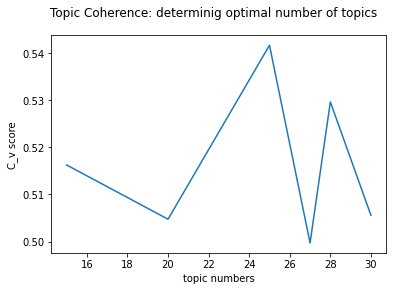

In [42]:
plt.plot([15, 20, 25, 27, 28, 30], [0.516260,0.504741,0.54167, 0.4997072, 0.5296383, 0.505570])
plt.ylabel('C_v score')
plt.xlabel('topic numbers')
plt.suptitle('Topic Coherence: determinig optimal number of topics')
plt.show()

##### we achieved model coherence to be approx 0.54 by experimenting with different num_topics, alpha and beta values.  

In [74]:
#running the model with all features 
corpus_lda = lda[corpus1_bows]

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
topic_assignments= lda.get_document_topics(corpus1_bows, minimum_probability=0, minimum_phi_value=None, per_word_topics=False)
lda_matirx = [ [entry[1] for entry in doc] for doc in topic_assignments ]


In [60]:
#clustering 
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score 
import statistics 

In [61]:
km = KMeans(n_clusters = 20, init="random", n_init=20)

In [62]:
km.fit_predict(lda_matirx)

array([12,  9,  3, ..., 16,  9,  2])

In [63]:
print(nmi_score(labels,km.labels_))

0.3546748684019234


### Running LDA with top 2000 features 

In [92]:
#running the model with top 2000 features 
lda2 = models.LdaModel(corpus2_bows, id2word=dict2, num_topics=25, alpha=0.01,
                                           eta=0.9);

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
coherence_model_lda2 = CoherenceModel(model=lda2, texts=data_lemmatized, dictionary=dict2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5511728411708449


In [94]:
corpus_lda2 = lda[corpus2_bows]

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
topic_assignments= lda2.get_document_topics(corpus2_bows, minimum_probability=0, minimum_phi_value=None, per_word_topics=False)
lda2_matirx = [ [entry[1] for entry in doc] for doc in topic_assignments ]


c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(lda2_matirx)
print(nmi_score(labels,km.labels_))

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.24957445745775492


#### save for future use

In [98]:
 
lda.save('lda_topic.model')
lda2.save('lda2_topic.model')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Visualizing the LDA topics

In [64]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [77]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('lda_topic.model')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.133992  0.091326       1        1  11.464979
5     -0.076846 -0.204837       2        1  10.028165
9     -0.108713 -0.011626       3        1   9.358017
14    -0.087467  0.122606       4        1   7.945593
16    -0.093209  0.051731       5        1   7.619042
4     -0.091375 -0.037534       6        1   7.035181
13    -0.104597  0.106920       7        1   6.065688
6     -0.068339 -0.152812       8        1   5.881800
11    -0.128060  0.014912       9        1   5.626690
24    -0.008590 -0.037880      10        1   4.426333
21     0.047335  0.096687      11        1   3.999842
20     0.084500 -0.125946      12        1   3.331147
8     -0.012318 -0.140869      13        1   3.196004
19     0.004794 -0.078004      14        1   2.607900
10     0.015567  0.024661      15        1   2.369480
3      0.054083  0.048434      16        1   2.264008
15    -0.001554  0.064247      17        1   2.147551
18     0.046274  0.043757      18        1   1.037619
7      0.074309  0.019032      19        1   0.918388
23     0.099756 -0.029127      20        1   0.714017
17     0.112180 -0.001616      21        1   0.427019
2      0.114497 -0.002462      22        1   0.411373
1      0.066191  0.039308      23        1   0.410992
22     0.036877  0.056835      24        1   0.406338
0      0.158696  0.042256      25        1   0.306833, topic_info=             Term         Freq        Total Category  logprob  loglift
176          file  3628.000000  3628.000000  Default  30.0000  30.0000
637          game  2113.000000  2113.000000  Default  29.0000  29.0000
1090        drive  1773.000000  1773.000000  Default  28.0000  28.0000
1896        image  2561.000000  2561.000000  Default  27.0000  27.0000
100          book  1298.000000  1298.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1322         king     7.038412   280.017028  Topic25  -6.2314   2.1032
9966    hawerchuk     4.420839    43.017922  Topic25  -6.6964   3.5113
3784       murphy     4.475295    53.157559  Topic25  -6.6842   3.3119
9972      mogilny     4.416944    45.158647  Topic25  -6.6973   3.4619
10244  lafontaine     4.417485    51.539012  Topic25  -6.6972   3.3299

[1476 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6490      1  0.116390    aaron
6490      2  0.014549    aaron
6490      3  0.014549    aaron
6490      4  0.014549    aaron
6490      5  0.014549    aaron
...     ...       ...      ...
6025     15  0.011786  zionist
6025     16  0.011786  zionist
6025     17  0.011786  zionist
6025     18  0.459650  zionist
6025     24  0.011786  zionist

[23139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 6, 10, 15, 17, 5, 14, 7, 12, 25, 22, 21, 9, 20, 11, 4, 16, 19, 8, 24, 18, 3, 2, 23, 1])

In [84]:
pyLDAvis.save_html(data,'lda_vis_25.html')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
d = gensim.corpora.Dictionary.load('dict2.dict')
c = gensim.corpora.MmCorpus('corpus2.mm')
lda = gensim.models.LdaModel.load('lda2_topic.model')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19     0.183883 -0.115671       1        1  8.773342
20    -0.094165  0.111056       2        1  8.160717
21     0.196120 -0.038994       3        1  6.615177
2      0.043532 -0.088099       4        1  6.391585
15    -0.105684 -0.064378       5        1  6.176385
14     0.177774  0.059556       6        1  5.511841
16    -0.014426  0.040375       7        1  5.509949
23    -0.100707 -0.053870       8        1  5.053934
22    -0.058111 -0.064064       9        1  4.769581
0     -0.004216  0.120204      10        1  4.722406
4     -0.009723 -0.041810      11        1  3.929106
24     0.141528 -0.097176      12        1  3.567698
13     0.002001  0.109169      13        1  3.552027
10    -0.002225  0.078559      14        1  3.014650
6     -0.058083 -0.059070      15        1  2.964329
9     -0.100736 -0.006644      16        1  2.795861
8     -0.084829 -0.018548      17        1  2.737013
11    -0.045760  0.025727      18        1  2.601606
5     -0.138597 -0.067830      19        1  2.538575
18     0.108014  0.053017      20        1  2.354707
7     -0.018741 -0.065789      21        1  2.133591
3     -0.082660 -0.043156      22        1  1.994360
17     0.085806  0.090044      23        1  1.859342
12     0.012354  0.075105      24        1  1.278371
1     -0.032352  0.062287      25        1  0.993848, topic_info=          Term         Freq        Total Category  logprob  loglift
116       file  4393.000000  4393.000000  Default  30.0000  30.0000
435       game  2671.000000  2671.000000  Default  29.0000  29.0000
353     window  2603.000000  2603.000000  Default  28.0000  28.0000
1473  armenian  1510.000000  1510.000000  Default  27.0000  27.0000
742      drive  2061.000000  2061.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
0         good    58.133452  4474.865926  Topic25  -5.0218   0.2679
342          s    51.377642  3227.443354  Topic25  -5.1453   0.4711
33        make    49.748122  3302.617443  Topic25  -5.1776   0.4158
240        use    47.583051  5600.072071  Topic25  -5.2221  -0.1567
396     people    42.119459  5704.369541  Topic25  -5.3440  -0.2971

[1306 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1569      1  0.052217  absolute
1569      2  0.004747  absolute
1569      3  0.014241  absolute
1569      4  0.009494  absolute
1569      5  0.056963  absolute
...     ...       ...       ...
251      21  0.005155      york
251      22  0.023196      york
251      23  0.010309      york
251      24  0.023196      york
251      25  0.012886      york

[22725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 21, 22, 3, 16, 15, 17, 24, 23, 1, 5, 25, 14, 11, 7, 10, 9, 12, 6, 19, 8, 4, 18, 13, 2])

In [101]:
pyLDAvis.save_html(data,'lda2_vis_25.html')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### LDA word cloud

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


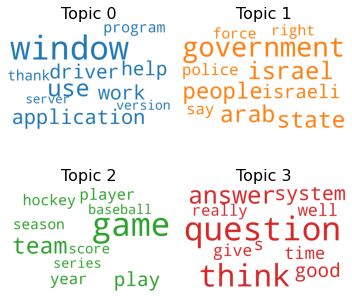

<Figure size 432x288 with 0 Axes>

In [104]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=1500,
                  height=1000,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(5,5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig('lda_wordcloud.png')

## Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole. Let’s plot the document word counts distribution.

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


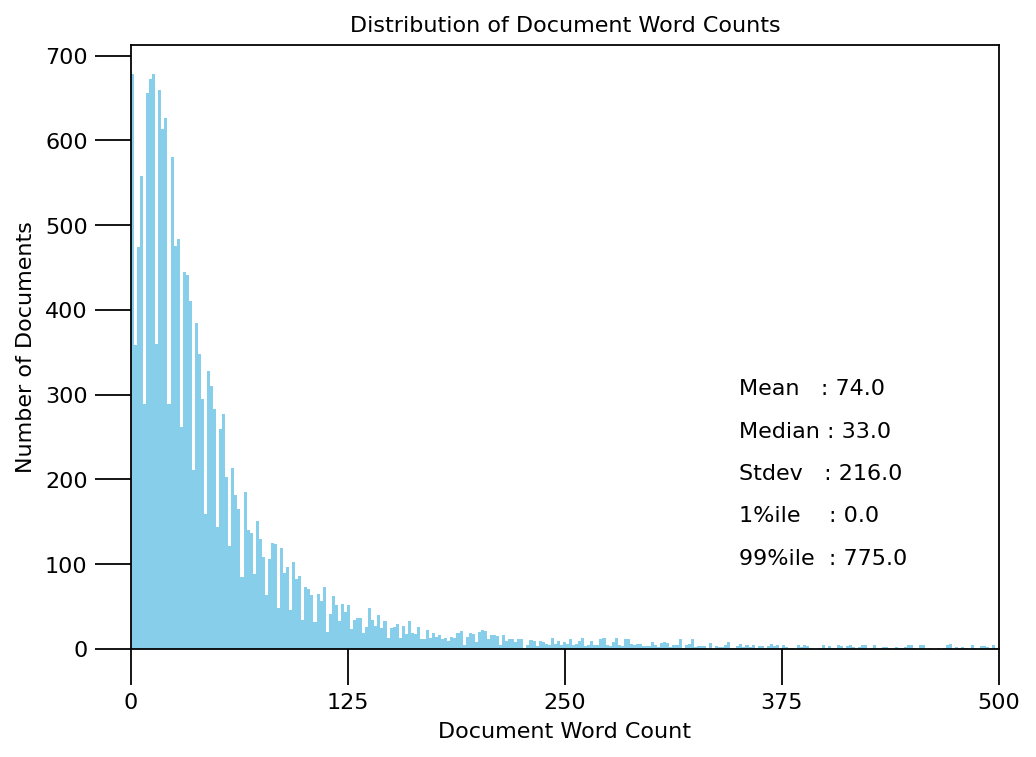

In [160]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(7,5), dpi=160)
plt.hist(doc_lens, bins = 3000, color = "skyblue")
plt.text(350, 300, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(350,  250, "Median : " + str(round(np.median(doc_lens))))
plt.text(350,  200, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(350,  150, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(350,  100, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 500), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,5))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=10))
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [161]:
plt.savefig('Distribution of Document Word Counts.png')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 432x288 with 0 Axes>

### Impact of different preprocessig ways

In [251]:
#using dict1 which had only gone through document frequency preprocesssing and not term frequency 
lda3 = models.LdaModel(corpus_bows_df, id2word=dict1, num_topics=20,alpha=0.01,
                                           eta=0.9);
#Compute Model Perplexity and Coherence Score
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda3, texts=data_lemmatized, dictionary=dict1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#running the model with all features 
corpus_lda = lda[corpus_bows_df]
lda3.save('lda3_topic.model')

d = gensim.corpora.Dictionary.load('dict1.dict')
c = gensim.corpora.MmCorpus('corpus_df.mm')
lda = gensim.models.LdaModel.load('lda3_topic.model')

data = pyLDAvis.gensim.prepare(lda, c, d)
data

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.49640559649197746


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.094859 -0.015613       1        1  16.221594
14     0.083287 -0.012061       2        1   9.080647
12    -0.053088 -0.131806       3        1   8.305651
18    -0.191583  0.048148       4        1   7.989627
19     0.085488 -0.116074       5        1   7.413806
2      0.077142 -0.145381       6        1   6.492526
15    -0.137527 -0.068231       7        1   5.562061
0      0.028898  0.091632       8        1   5.375641
4      0.136407  0.034980       9        1   5.322971
17    -0.144923  0.008355      10        1   4.813214
7     -0.058638 -0.006393      11        1   3.584284
10     0.067847  0.047314      12        1   3.522263
16    -0.103039  0.033040      13        1   3.474547
8      0.034735  0.107858      14        1   3.278610
3      0.072295  0.112339      15        1   3.114797
13     0.034433 -0.017766      16        1   2.474377
6      0.027257 -0.003947      17        1   1.445440
5      0.009091  0.017017      18        1   0.937221
1     -0.006335 -0.005712      19        1   0.866383
11    -0.056606  0.022297      20        1   0.724340, topic_info=           Term         Freq        Total Category  logprob  loglift
593        game  2464.000000  2464.000000  Default  30.0000  30.0000
171        file  3396.000000  3396.000000  Default  29.0000  29.0000
1738      image  2454.000000  2454.000000  Default  28.0000  28.0000
2483   armenian  1366.000000  1366.000000  Default  27.0000  27.0000
1350  christian  1394.000000  1394.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
534        work    26.050981  4118.757830  Topic20  -5.7729  -0.1356
850      result    21.547115  1122.502396  Topic20  -5.9628   0.9746
355        well    24.793819  5044.428190  Topic20  -5.8224  -0.3878
331      system    22.266151  3517.389889  Topic20  -5.9299  -0.1347
67         time    22.482601  5191.804081  Topic20  -5.9203  -0.5144

[1282 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2726      1  0.213233   absolute
2726      2  0.010935   absolute
2726      3  0.005468   absolute
2726      4  0.060143   absolute
2726      5  0.010935   absolute
...     ...       ...        ...
73       16  0.008328  yesterday
73       17  0.002776  yesterday
73       18  0.002776  yesterday
73       19  0.008328  yesterday
73       20  0.019432  yesterday

[18850 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 13, 19, 20, 3, 16, 1, 5, 18, 8, 11, 17, 9, 4, 14, 7, 6, 2, 12])

In [105]:
lda4 = models.LdaModel(corpus_bows_trigram, id2word=dictionary_alt, num_topics=25,alpha=0.01,
                                           eta=0.9);
#Compute Model Perplexity and Coherence Score
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda4, texts=data_lemmatized, dictionary=dictionary_alt, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#running the model with all features 
corpus_lda = lda[corpus_bows_trigram]
lda4.save('lda4_topic.model')

d = gensim.corpora.Dictionary.load('dictionary_alt.dict')
c = gensim.corpora.MmCorpus('corpus_trigram.mm')
lda = gensim.models.LdaModel.load('lda4_topic.model')

data = pyLDAvis.gensim.prepare(lda, c, d)
data

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5349178236135761


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.179042 -0.093212       1        1  20.953214
19    -0.163607  0.154026       2        1  13.226974
21    -0.122441 -0.068354       3        1   7.838811
5     -0.078435 -0.118896       4        1   6.582426
10    -0.086341  0.100464       5        1   5.686228
20    -0.071904  0.165844       6        1   5.626767
2     -0.035969 -0.050612       7        1   5.463071
0     -0.069102  0.062638       8        1   5.190003
12    -0.040802 -0.100025       9        1   4.803198
14    -0.034743  0.034599      10        1   4.399384
15    -0.037267 -0.131972      11        1   4.092402
24    -0.009197  0.002382      12        1   3.296961
8     -0.036799 -0.104420      13        1   2.680704
18     0.001832  0.065036      14        1   2.598109
3      0.041754  0.097835      15        1   1.975219
9      0.075964 -0.023822      16        1   1.662182
1      0.041613 -0.042821      17        1   1.125360
16     0.093997  0.000839      18        1   0.804153
4      0.057897  0.045438      19        1   0.793765
6      0.169835 -0.014007      20        1   0.558294
17     0.090471  0.034046      21        1   0.199656
13     0.079221  0.003993      22        1   0.128213
7      0.100828  0.000648      23        1   0.124852
23     0.109530 -0.012095      24        1   0.120846
22     0.102706 -0.007552      25        1   0.069209, topic_info=        Term         Freq        Total Category  logprob  loglift
175     file  3481.000000  3481.000000  Default  30.0000  30.0000
633     game  2364.000000  2364.000000  Default  29.0000  29.0000
1886   image  2107.000000  2107.000000  Default  28.0000  28.0000
1082   drive  2017.000000  2017.000000  Default  27.0000  27.0000
515   window  2508.000000  2508.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
379     well     0.608066  4947.054499  Topic25  -7.1879  -1.7282
60      time     0.538624  5032.456990  Topic25  -7.3092  -1.8666
4200  bright     0.413422   157.267451  Topic25  -7.5738   1.3346
33      hear     0.471819  1594.281594  Topic25  -7.4416  -0.8495
1       good     0.435595  4208.681306  Topic25  -7.5215  -1.9002

[1470 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3017      1  0.014903  acceleration
3017      2  0.044710  acceleration
3017      3  0.014903  acceleration
3017      4  0.014903  acceleration
3017      5  0.044710  acceleration
...     ...       ...           ...
6785     15  0.043806         zombo
6785     16  0.043806         zombo
6785     17  0.043806         zombo
6785     19  0.043806         zombo
6785     20  0.350446         zombo

[22612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 20, 22, 6, 11, 21, 3, 1, 13, 15, 16, 25, 9, 19, 4, 10, 2, 17, 5, 7, 18, 14, 8, 24, 23])

In [106]:
pyLDAvis.save_html(data,'lda4_vis_25.html')

c:\users\samee\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
